# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Riccardo Beccaria - Luglio 2021</span>

# <span style="color:green"> Esercitazione 11<span>
 

### Esercizio 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In questa esercitazione vengono presentate le reti neurali. Le <font color="red">Reti Neurali</font> sono un esempio di *Deep Learning*. Questi metodi sono dei predittori che possono essere usati in vari campi con lo scopo di predire certi valori in output ricevendo in ingresso dei dati forniti dall'utente. In particolare, in questo esercizio si vanno ad utilizzare le reti neurali per eseguire dei *fit* di alcune funzioni: una funzione lineare, un polinomio di terzo grado e da ultimo una funzione $z=f(x,y)$.

Per definire una rete neurale bisogna compiere delle scelte sul modello. Le principali scelte da compiere sono:
1. L'architettura della rete: quanti layer nascosti si vogliono porre nel modello, quanti neuroni per layer e che tipologia di layer (tutti neuroni connessi o meno).
2. Le funzioni di attivazioni per ciascun layer: possono essere lineari a tratti (come le Relu, LeakyRelu...) o non linerai (sigmoidi, tanh,...). Queste sono le funzioni utilizzate per determinare l'output del singolo neurone.
3. La *Loss Function*: la funzione costo, che quantifica la distanza dell'output della rete dal valore reale atteso.
4. L'ottimizzatore: l'algoritmo con cui si variano i pesi e i bias dei singoli neuroni per spostarsi verso il minimo della funzione costo.

Una rete neurale viene allenata ricevendo in ingresso un certo set di dati che viene chiamato *Training Set* che contiene un certo numero $N_{train}$ di dati formati da input e output noti. Nella fase di *training* la rete prende in ingresso i dati del training set e l'ottimizzatore aggiusta i pesi e i bias della rete affinchè la predizione della rete sia il più possibile prossima all'output fornito dall'insieme di training. Una volta terminato il processo di training si procede con la *validazione*. Alla rete neurale viene fornito un ulteriore insieme di dati *Validation Set* su cui la rete non è stata trainata. In questo modo è possibile andare a studiare come è aumentata la capacità della rete di predire l'output ricevendo in ingresso dati che non ha mai visto prima. Questo insieme di validazione ha un certo numero $N_{validation}$ di dati e solitamente questo numero è di gran lunga inferiore al numero di dati utilizzati per la fase di training.

Nel primo punto di questa esercitazione si utilizza un percettrone per fittare una semplice funzione lineare. Un <font color="red">percettrone</font> è una particolarissima rete neurale composta da un singolo neurone. L'obbiettivo è quello di vedere come varia la capacità di predizione del percettrone cambiando tre particolari parametri che sono:
- La $\sigma$ che rappresenta l'errore con cui sono distribuiti i dati del *Training Set*
- Il numero $N_{epochs}$ con cui alleno la rete neurale. Dove per epoca si intende l'aver ricevuto una volta in ingresso tutti i dati di train.
- Il numero $N_{train}$ di punti con cui alleno la rete neurale.

Per questo primo punto dell'esercitazione si usa come *loss function* la funzione:

$$ MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2$$

Ho variato ciascun parametro tenendo fissi gli altri valori. Ho riportato nei grafici quì sotto, i risultati ottenuti, mostrando come migliora o peggiore la predizione della rete neurale variando questi parametri. Per semplicità ed eleganza del report ho definito una funzione che definisce e allena la rete neurale ricevendo in ingresso $\sigma$, $N_{epochs}$ e $N_{train}$. In questo modo posso definire e allenare il percettrone richiamando semplicemente quella funzione.

In [4]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
%config InlineBackend.figure_format = 'retina'


def Train_my_net(sigma, N_points, N_epoch):
    
    print("####################################################################################")
    print("##                                                                                ##")
    print("##            Model with sigma = " + str(sigma)+ "; Train_points = " +str(N_points)+ "; N_epoch = "+ str(N_epoch) +"              ##")
    print("##                                                                                ##")
    print("####################################################################################")
    # generate training inputs
    np.random.seed(0)
    x_train = np.random.uniform(-1, 1, N_points)
    x_valid = np.random.uniform(-1, 1, 50)
    x_valid.sort()
    y_target = m * x_valid + b # ideal (target) linear function

    sigma = sigma # noise standard deviation, for the moment it is absent
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
    y_valid = np.random.normal(m * x_valid + b, sigma)

    # plot validation and target dataset
    
    fig, axs= plt.subplots(1,2, figsize=(14,6))
    axs[0].plot(x_valid, y_target, label='target')
    axs[0].scatter(x_train, y_train, color='r', label='train data')
    #axs[0].scatter(x_valid, y_valid, color='r', label='validation data')
    axs[0].legend()
    axs[0].grid(True)
    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))

    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.summary()
    history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)
    model.get_weights()

    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    # print performance
    print()
    print("Evaluate model over valid set!")
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # evaluate model with the exact curve
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

    # print performance
    print()
    print("Evaluate model over target function!")
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Test'], loc='best')
    axs[1].grid()

    plt.figure(figsize=(7,6))
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='orangered')
    plt.plot(x_valid, y_target)
    plt.legend(['Target', 'y_predicted'], loc='best')
    plt.grid(True)
    plt.show()
    print("================================================================================")
    print("==                                                                            ==")
    print("==                              END MODEL                                     ==")
    print("==                                                                            ==")
    print("================================================================================")
    print(" ")
    print(" ")
    print(" ")

####################################################################################
##                                                                                ##
##            Model with sigma = 0; Train_points = 500; N_epoch = 30              ##
##                                                                                ##
####################################################################################
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

Evaluate model over valid set!
Test loss: 0.0024863011203706264
Test accuracy: 0.0024863011203706264

Evaluate model over target function!
Test loss: 0.0024863011203706264
Test accuracy: 0.0024863011203706264


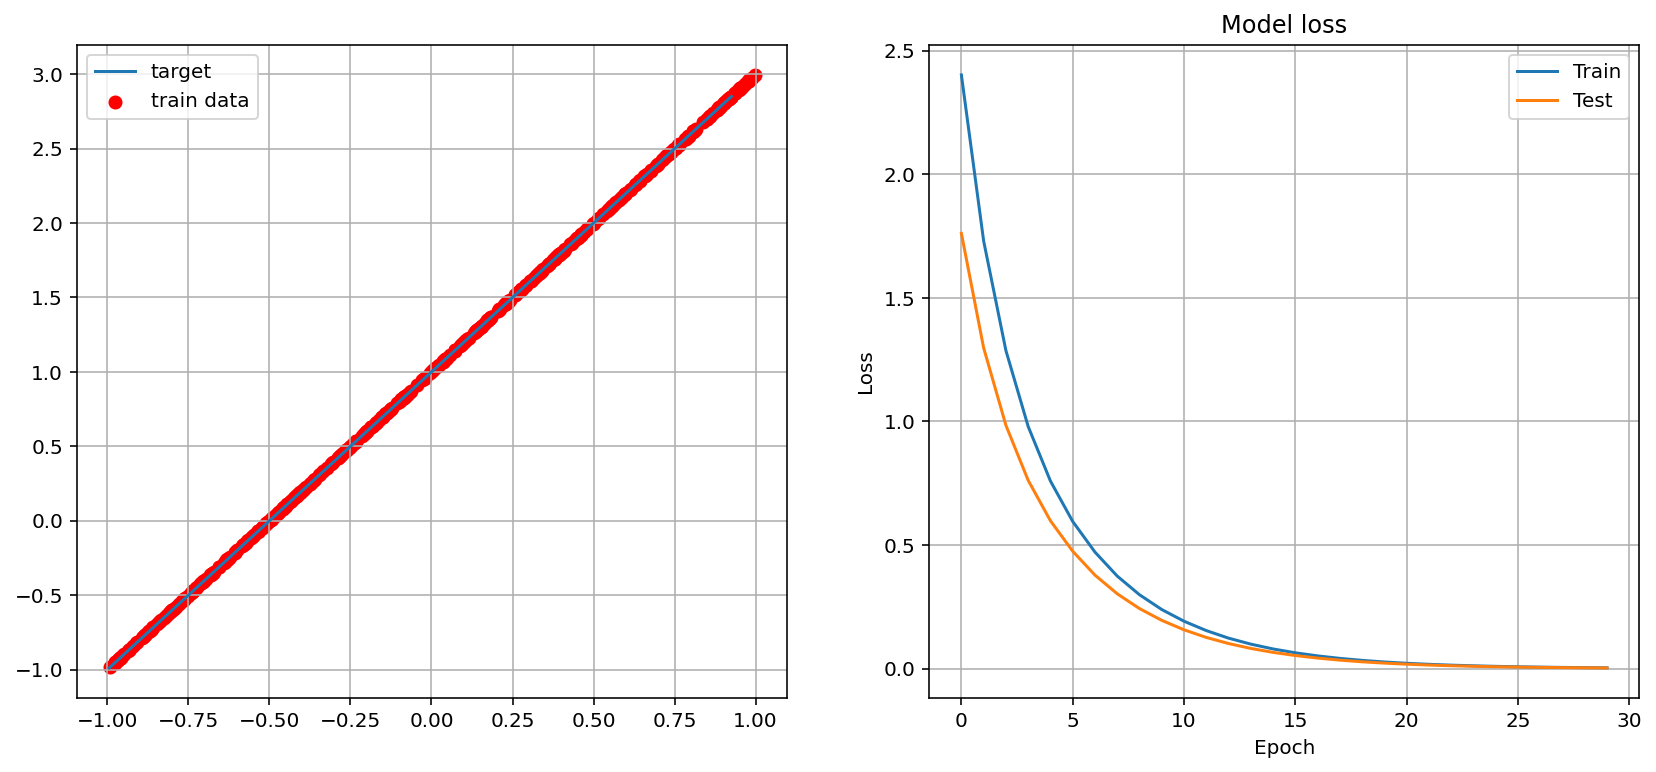

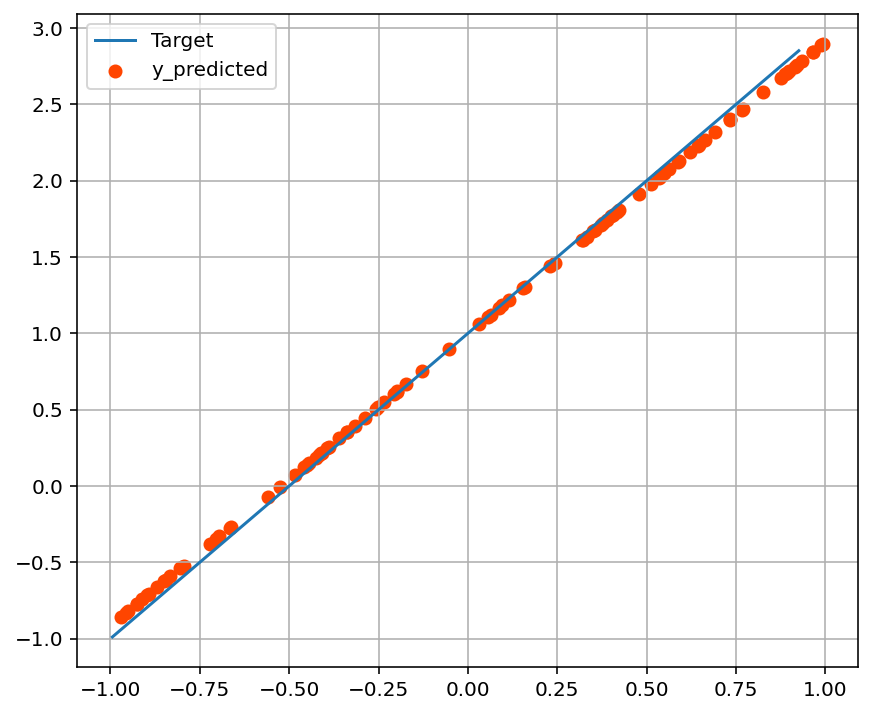

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 
####################################################################################
##                                                                                ##
##            Model with sigma = 0.25; Train_points = 500; N_epoch = 30              ##
##                                                                                ##
####################################################################################
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
___________________________________________

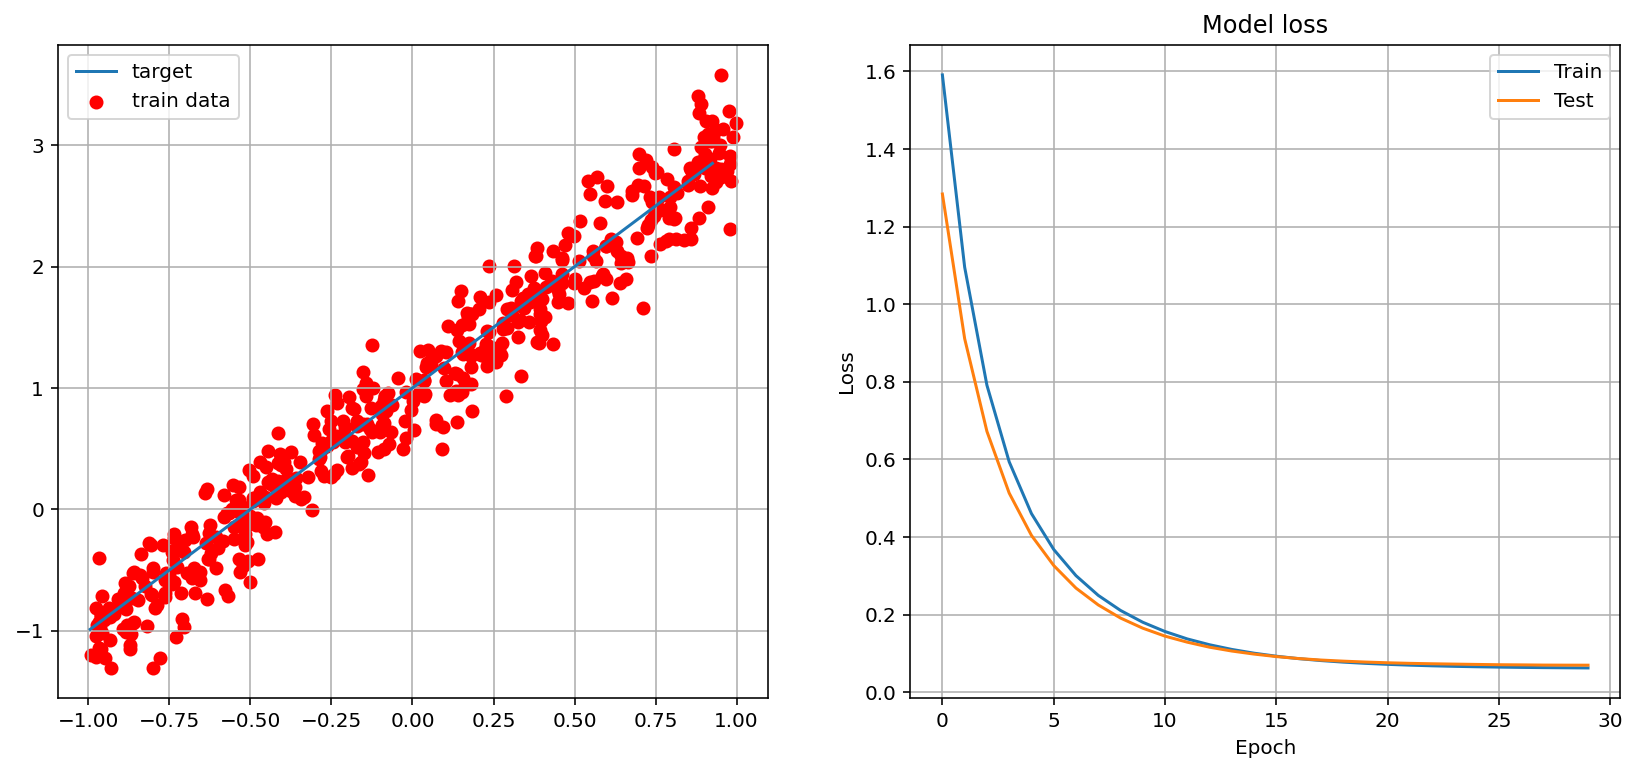

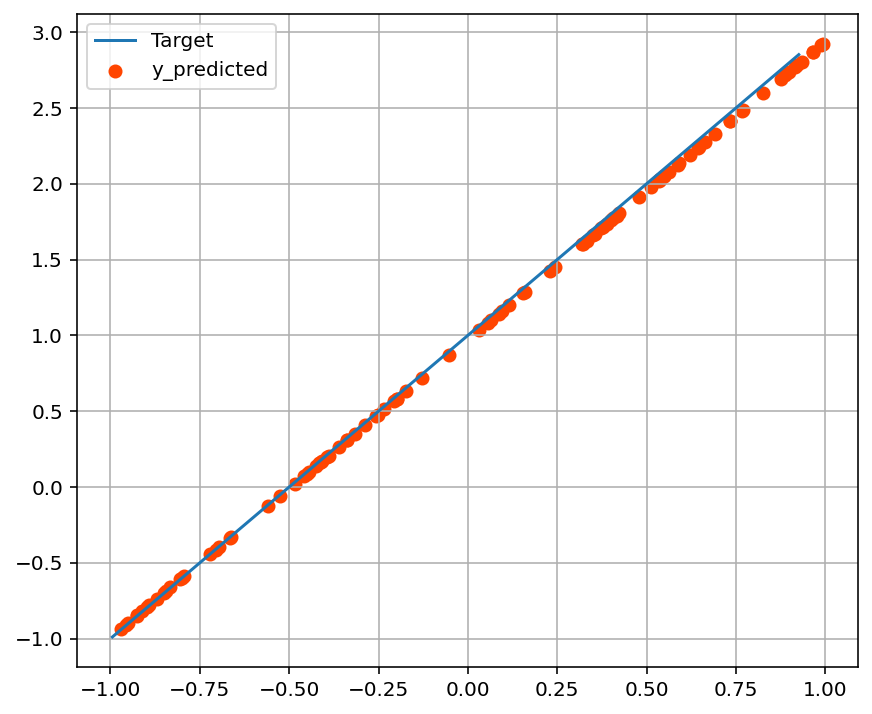

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 
####################################################################################
##                                                                                ##
##            Model with sigma = 0.6; Train_points = 500; N_epoch = 30              ##
##                                                                                ##
####################################################################################
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
____________________________________________

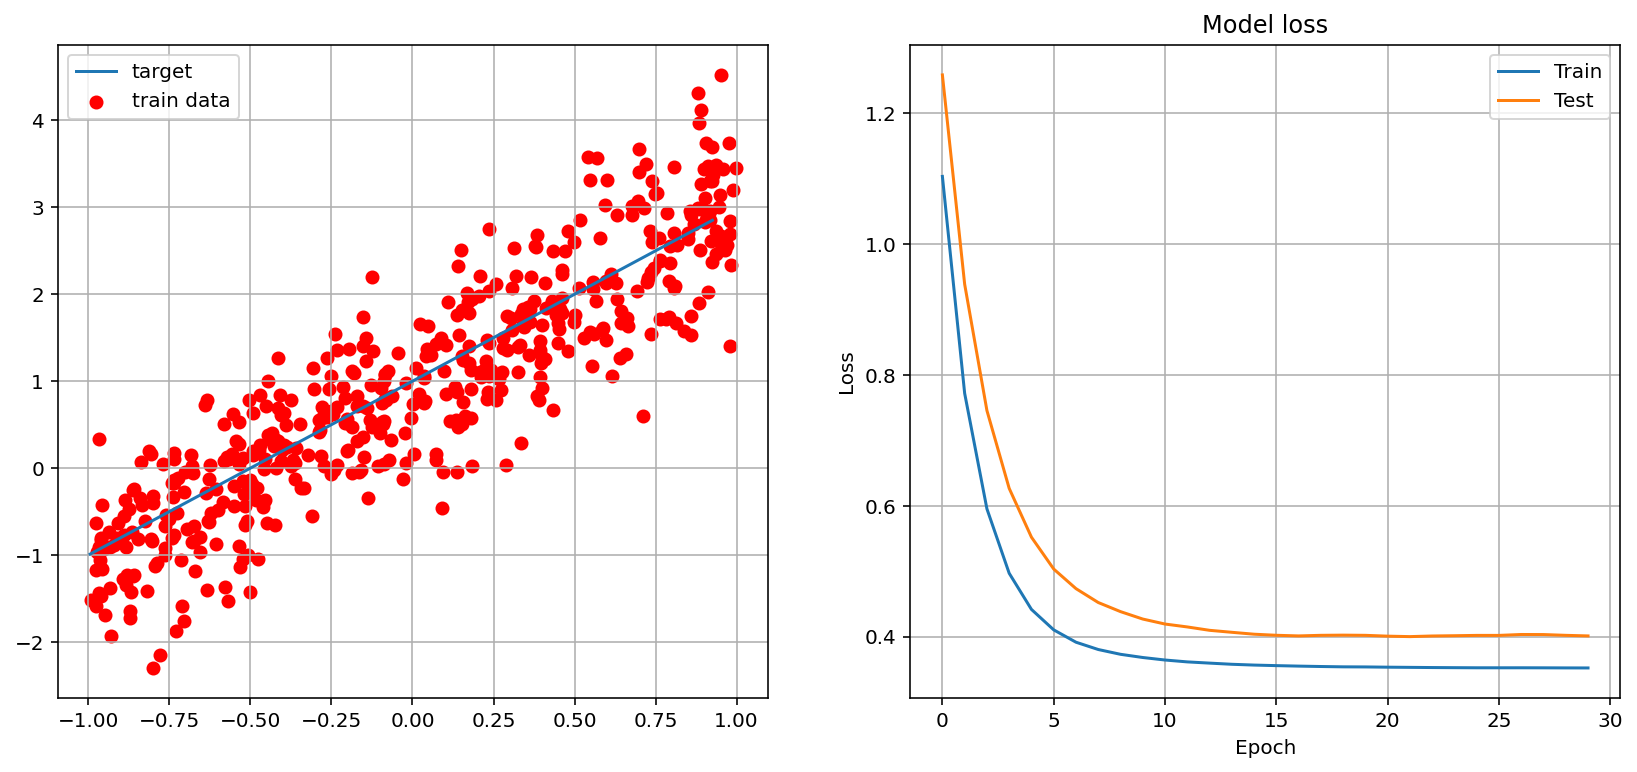

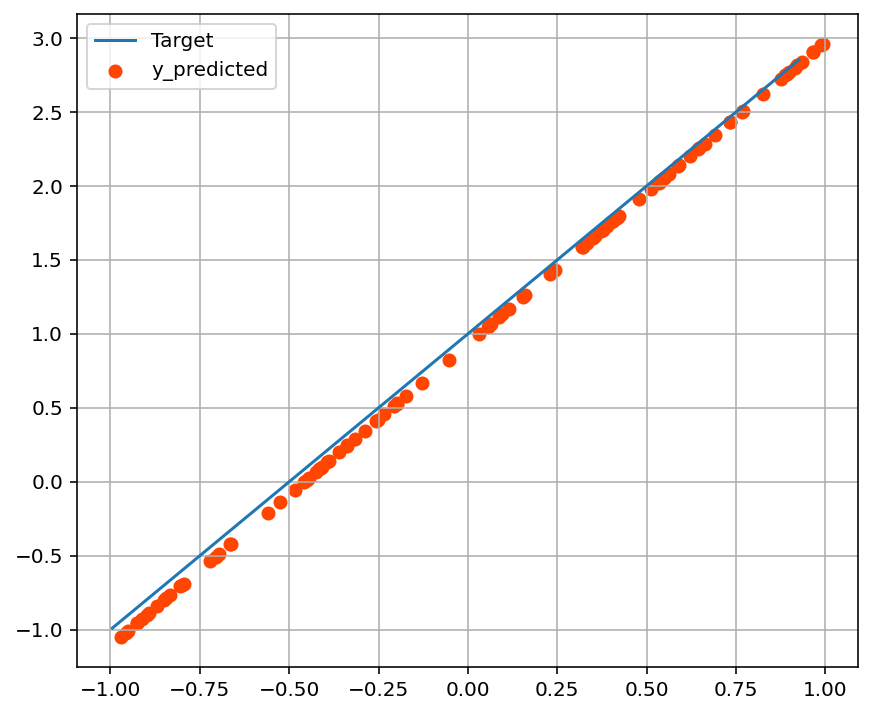

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 
####################################################################################
##                                                                                ##
##            Model with sigma = 2; Train_points = 500; N_epoch = 30              ##
##                                                                                ##
####################################################################################
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
______________________________________________

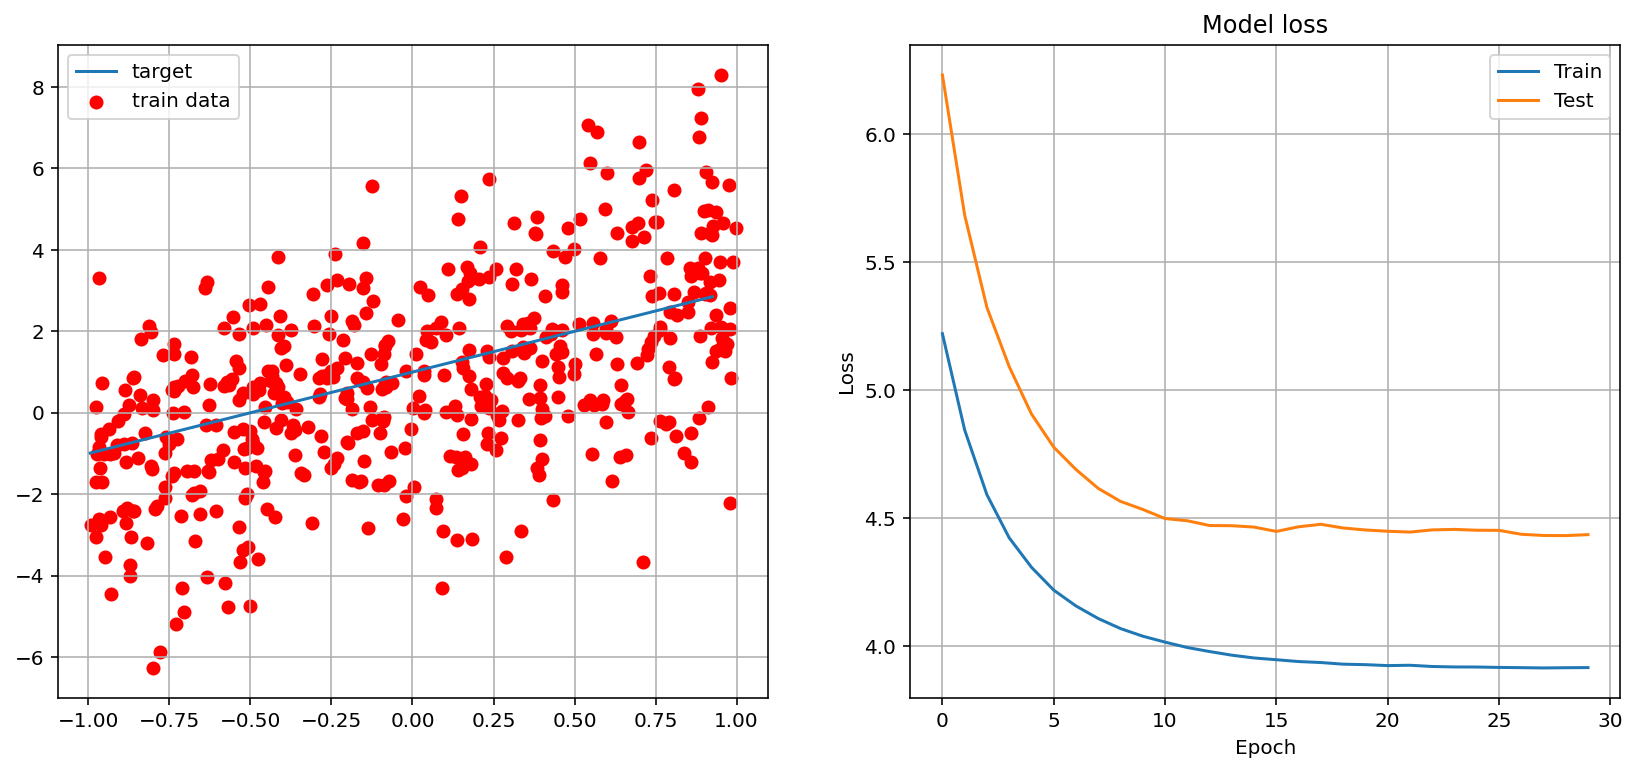

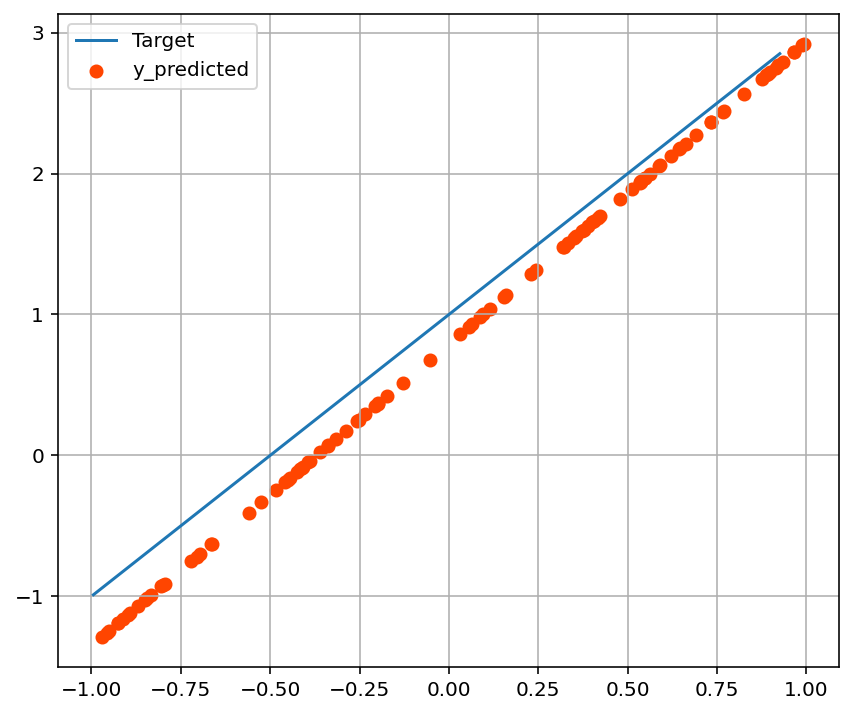

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 


In [6]:
sigmas=[0,0.25,0.6,2]
for sigma in sigmas:
    Train_my_net(sigma,500,30)


Tenendo fisse i valori di $N_{epochs}$ e $N_{train}$ ho valutato la rete neurale con $\sigma \in [0,0.25, 0.6, 2]$.

Una prima importante osservazione da fare è che nel caso in cui $\sigma$ è uguale a zero, la funzione costo calcolata sul validation set e sul target set è chiaramente uguale: avendo un rumore nullo i dati del validation set si trovano esattamente sulla funzione lineare che voglio fittare, come effettivamente accade per i dati target.

Ad eccezzione di questo particolarissimo caso,il modello migliore è quello per cui si ha $\sigma =0.25$, come ci si poteva aspettare. Infatti aumentando $\sigma$, aumenta il rumore con cui i dati di train e di validation vengono estratti: la rete fatica maggiormente a fittare la relazione deisderata proprio per la grande dispersione dei dati con cui viene allenata.

Con $\sigma=0.25$ i dati di train più prossimi ai dati che si vogliono modellizzare.



####################################################################################
##                                                                                ##
##            Model with sigma = 0.3; Train_points = 500; N_epoch = 3              ##
##                                                                                ##
####################################################################################
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

Evaluate model over valid set!
Test loss: 0.3678125739097595
Test accuracy: 0.3678125739097595

Evaluate model over target function!
Test loss: 0.19118529558181763
Test accuracy: 0.19118529558181763


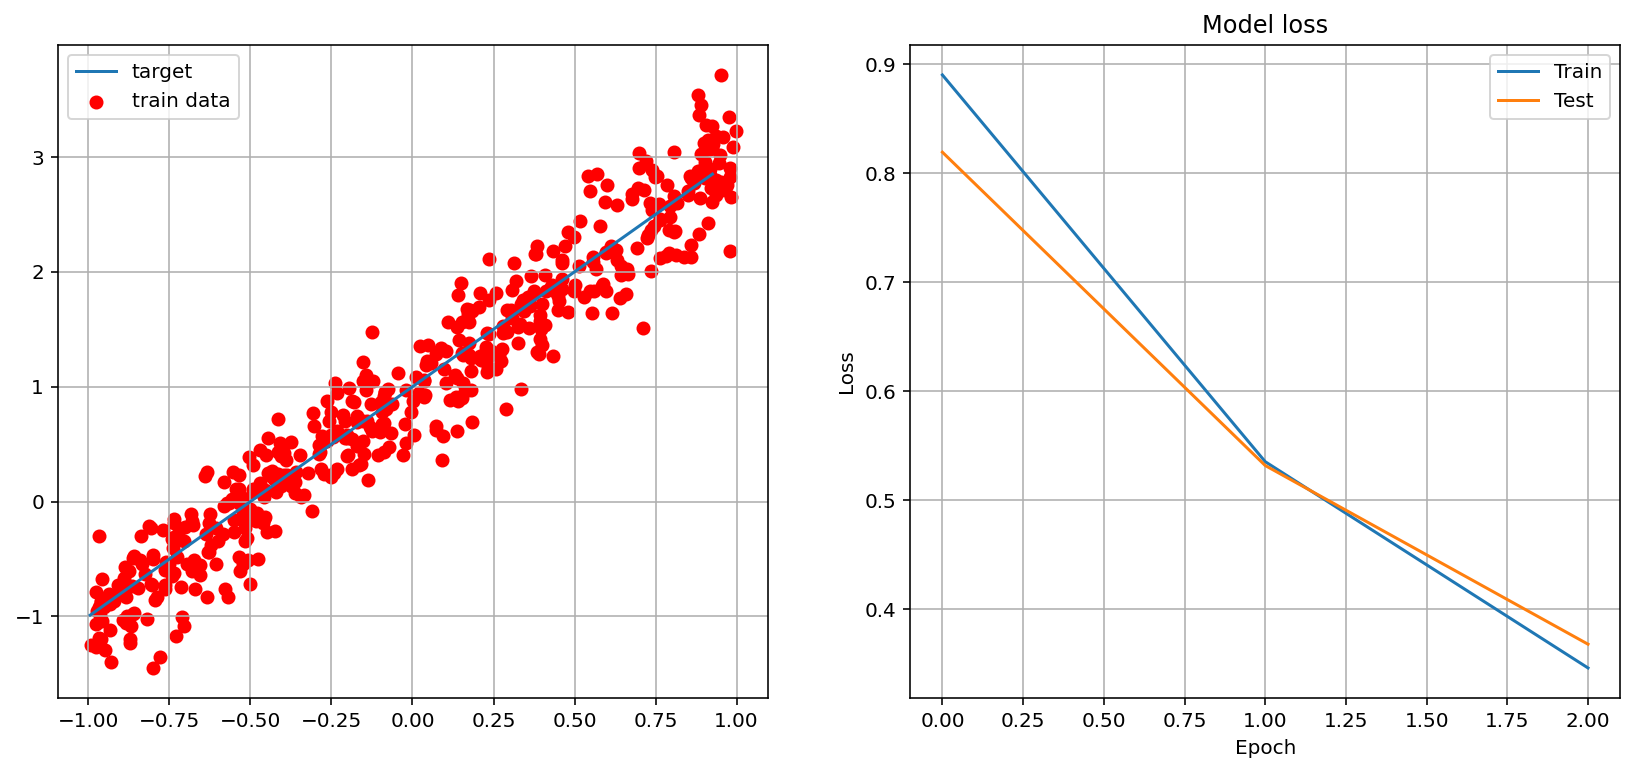

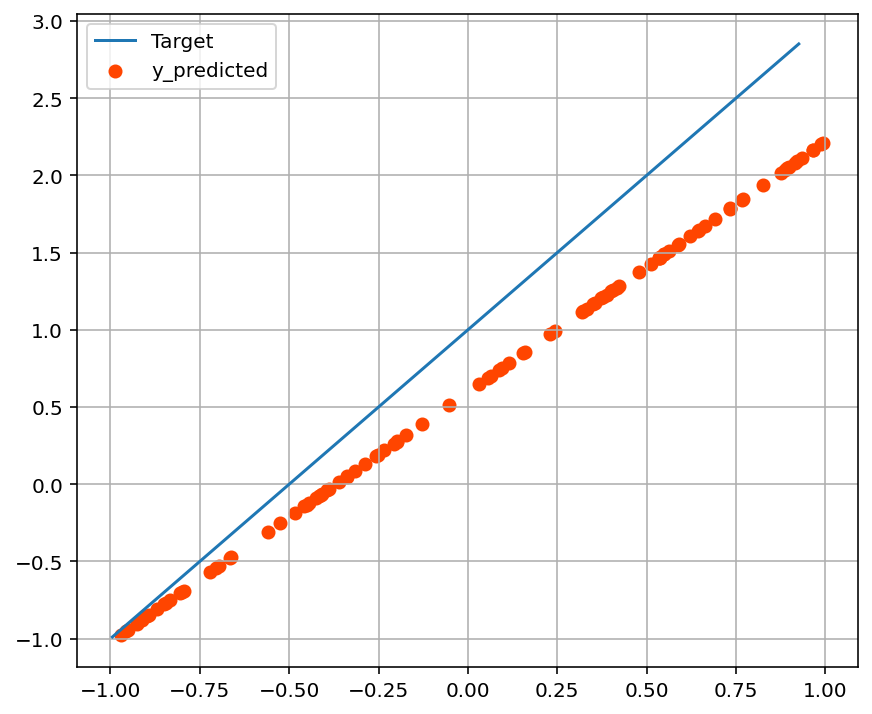

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 
####################################################################################
##                                                                                ##
##            Model with sigma = 0.3; Train_points = 500; N_epoch = 30              ##
##                                                                                ##
####################################################################################
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
____________________________________________

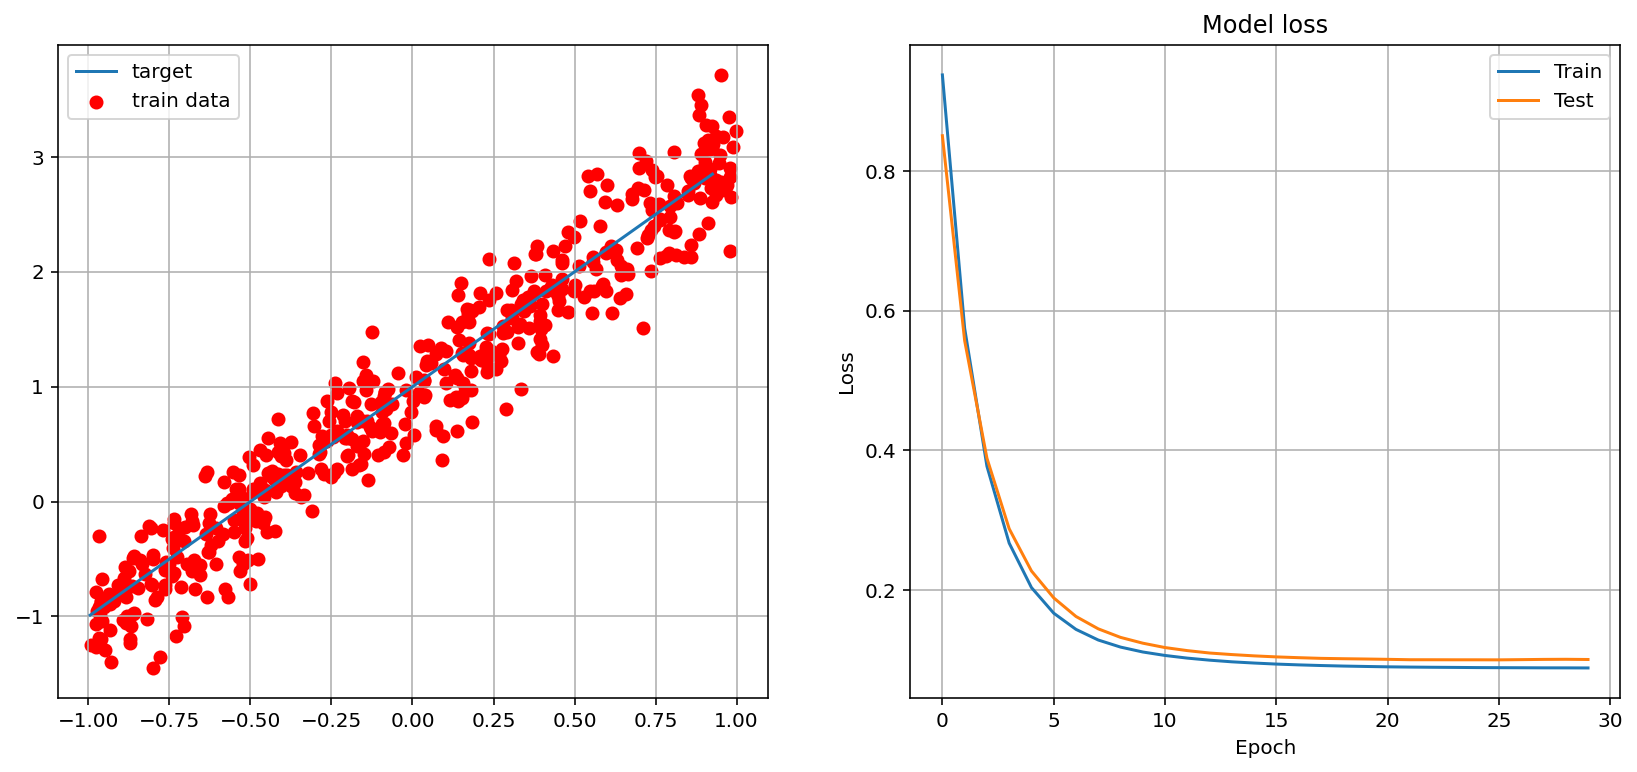

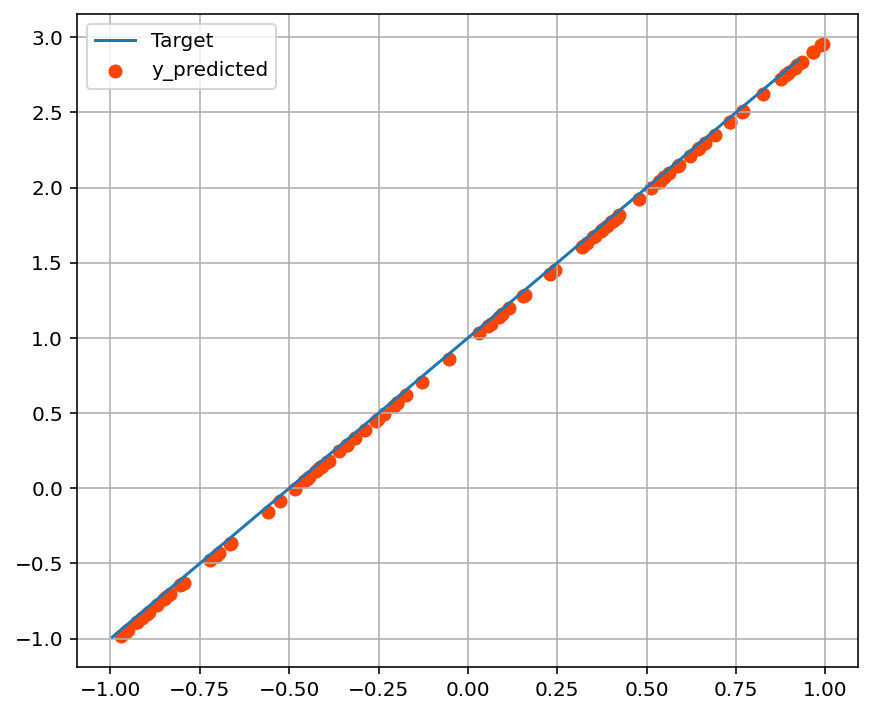

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 
####################################################################################
##                                                                                ##
##            Model with sigma = 0.3; Train_points = 500; N_epoch = 300              ##
##                                                                                ##
####################################################################################
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
___________________________________________

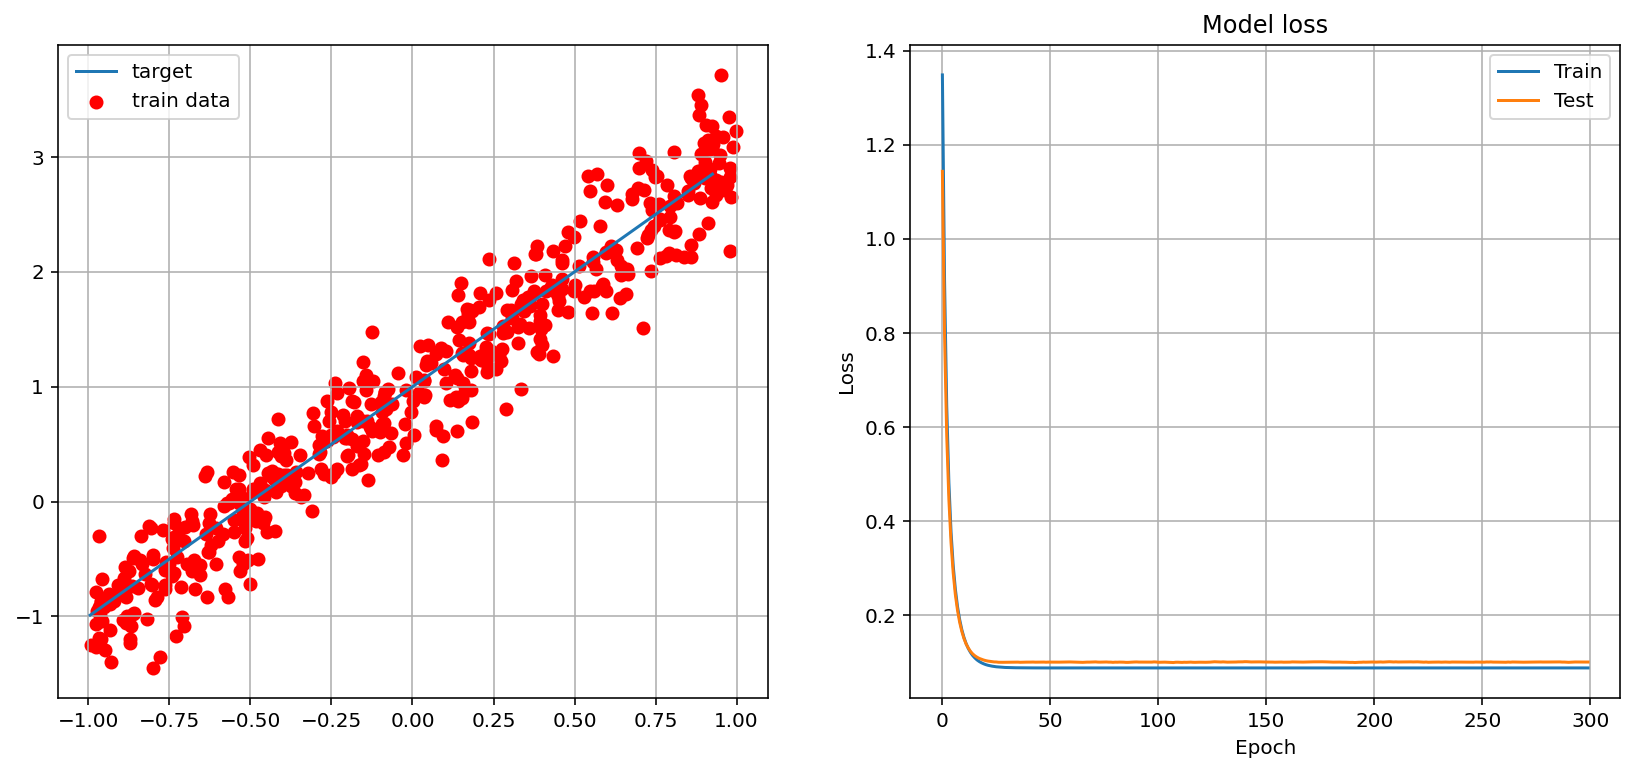

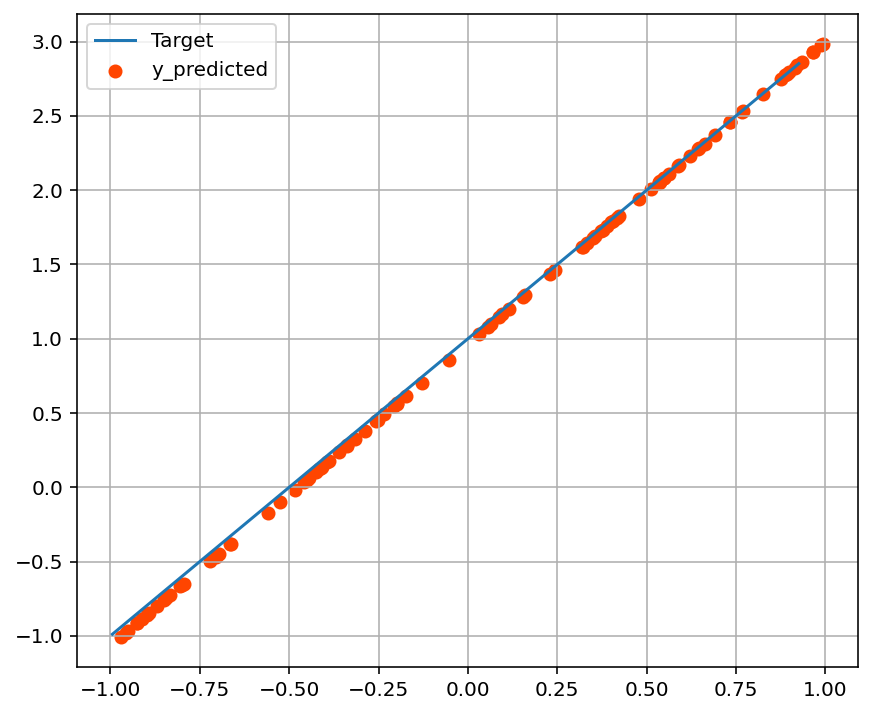

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 


In [6]:
epochs=[3,30,300]
for epoch in epochs:
    Train_my_net(0.3,500,epoch)


I risultati mostrati nei grafici soprastanti sono i risultati dei modelli in cui ho tenuto fissi i valori di $N_{train}$ e $\sigma$, mentre ho fatto variare $N_{epochs} \ in [3,30,300]$:
1. Il primo allenamento è stato fatto con un numero di epoche pari a 3. Ovviamente il tempo di training è molto piccolo, ma come ci si può facilmente immaginare i risultati della rete non sono ottimali. L'errore sul validation set è pari a 0.4486 e come si può vedere anche dal grafico in cui viene plottato la $y_{predicted}$ e la funzione target è evidente la discrepanza tra i due set di dati. Il training della rete deve essere più consistente.

2. Il secondo allenamento è stato fatto con un numero di epoche paria 30. In questo caso il tempo di training è molto accettabile, e si ottengono delle ottime performance della rete neurale.

3. Il terzo allenamento è stato invece fatto con un numero di epoche pari a 300. Come ci si può immaginare il tempo di training è decisamente elevato. Inoltre questo elevato tempo di training non porta ad un così netto miglioramento della predizione della rete. Infatti confrontando la loss del terzo modello (300 epoche) col la loss del secondo modello (30 epoche), si può vedere che l'*MSE* del secondo modello è addirittura più piccolo del'*MSE* del terzo. Un incremento del numero di epoche non necessariamente porta come conseguenza un miglioramento del modello. Tuttavia, in questo caso non parlerei ancora di *overfitting* perchè la funzione che il percettrone sta provando a fittare è una funzione davvero banale.

Tuttavia questo allenamento ha evidenziato il <font color="red">Primo Limite</font> delle reti neurale. Una architettura complessa o un elevatissimo numero di epoche con cui si effettua la fase di training, non necessariamente conduce ad un miglioramento del modello, anzi a volte aumenta soltanto il costo computazionale del modello stesso.


####################################################################################
##                                                                                ##
##            Model with sigma = 0.3; Train_points = 50; N_epoch = 30              ##
##                                                                                ##
####################################################################################
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

Evaluate model over valid set!
Test loss: 0.7585905194282532
Test accuracy: 0.7585905194282532

Evaluate model over target function!
Test loss: 0.7063775062561035
Test accuracy: 0.7063775062561035


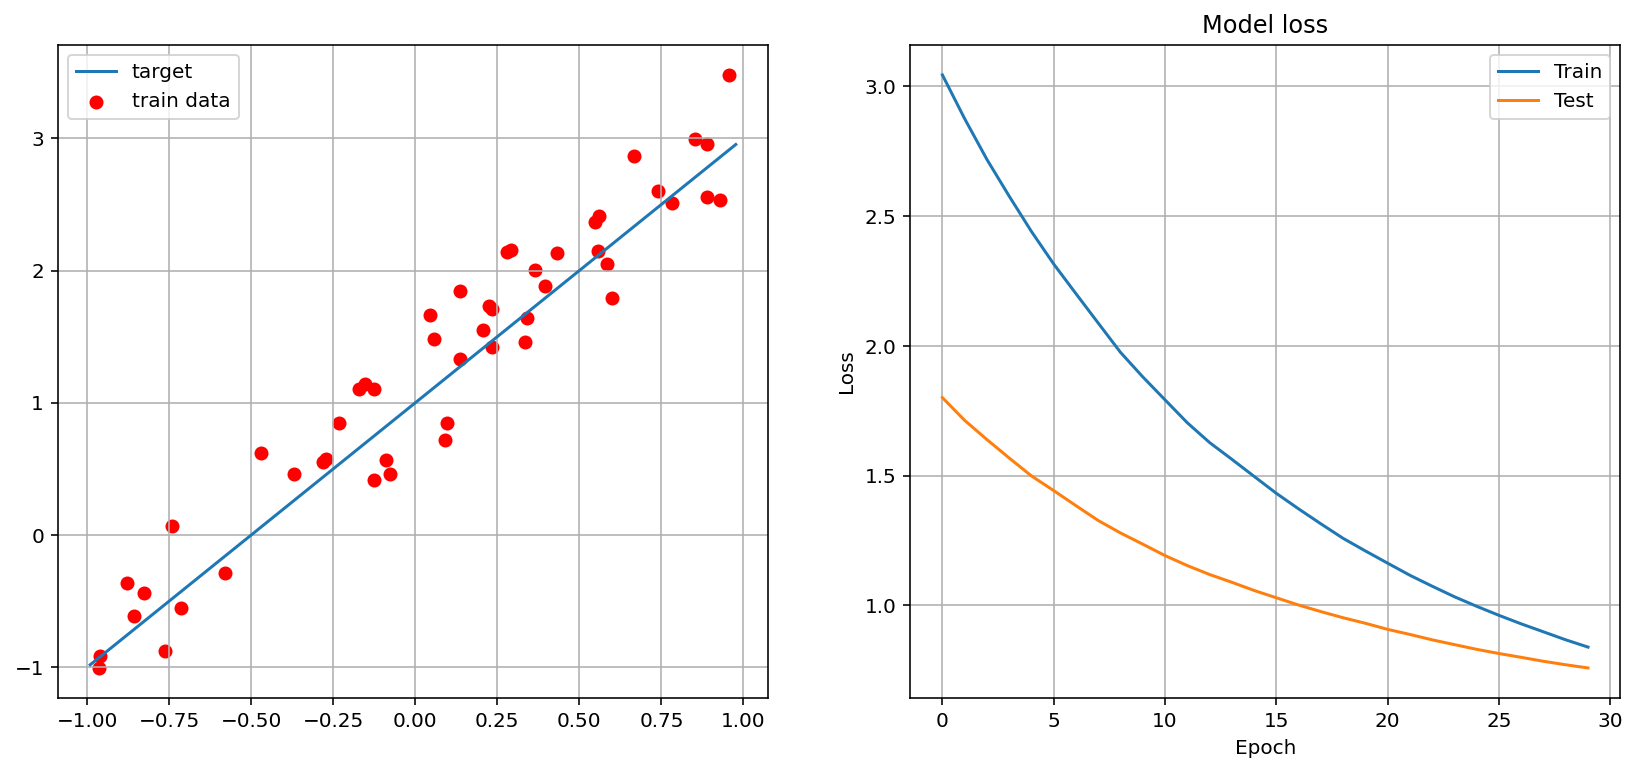

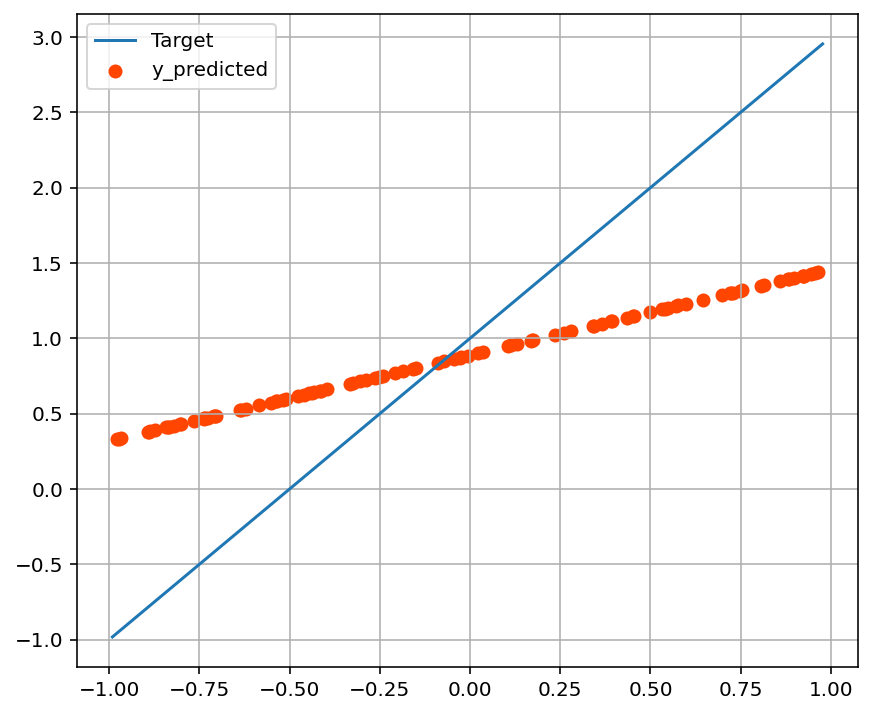

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 
####################################################################################
##                                                                                ##
##            Model with sigma = 0.3; Train_points = 500; N_epoch = 30              ##
##                                                                                ##
####################################################################################
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
___________________________________________

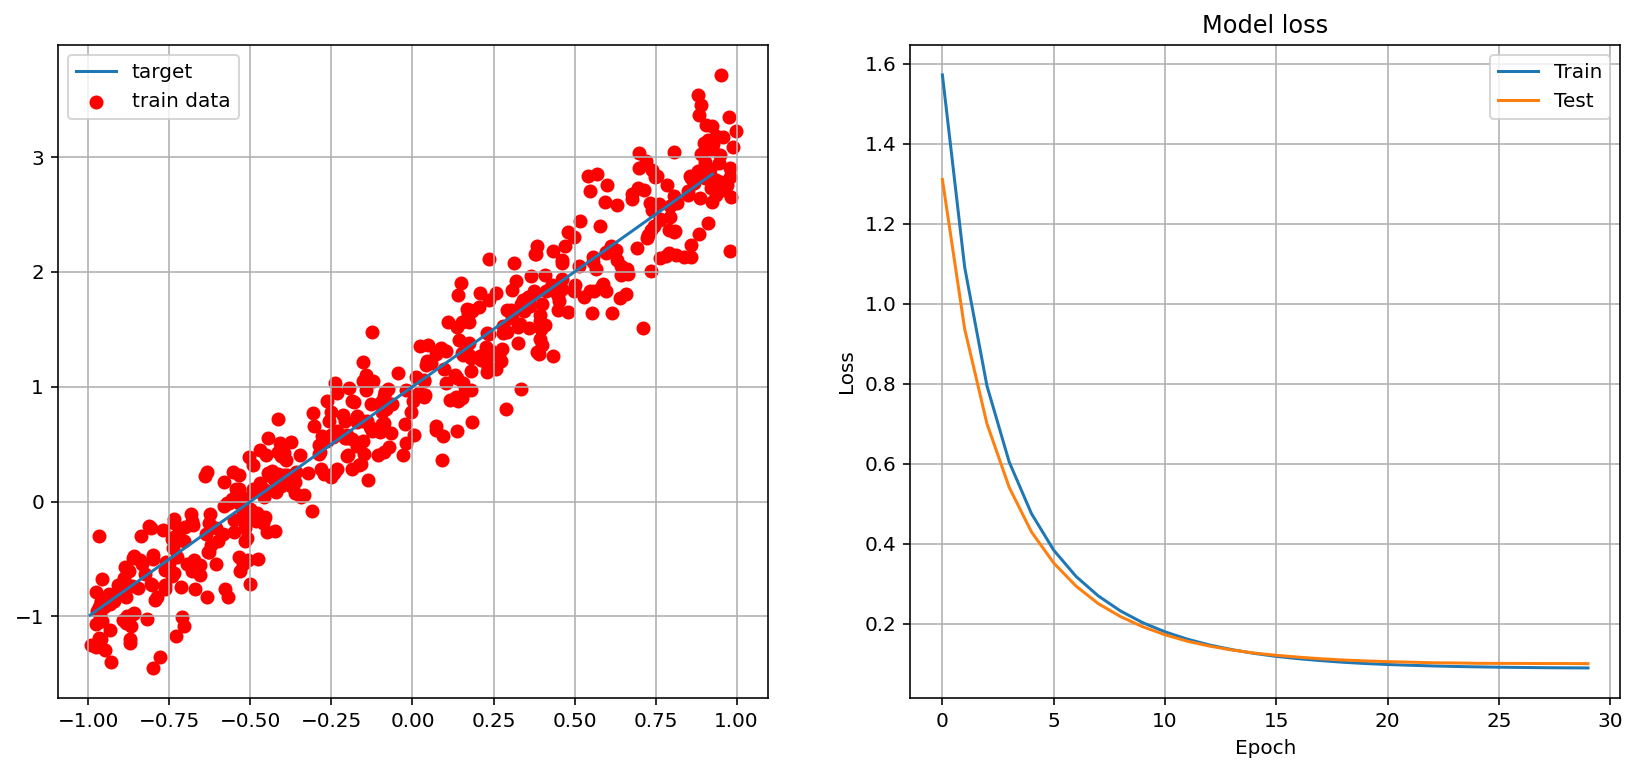

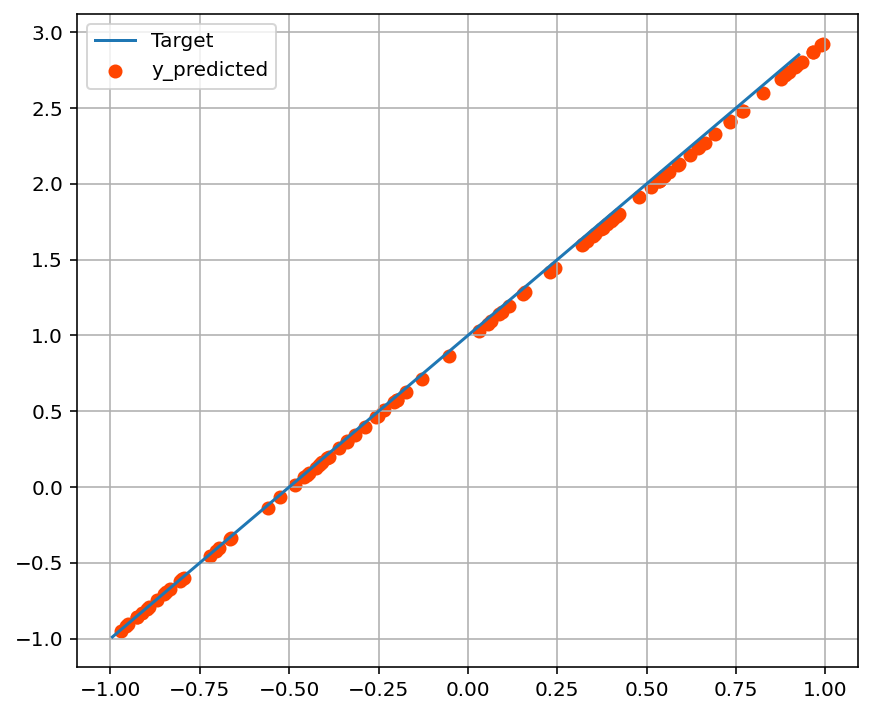

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 
####################################################################################
##                                                                                ##
##            Model with sigma = 0.3; Train_points = 50000; N_epoch = 30              ##
##                                                                                ##
####################################################################################
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________

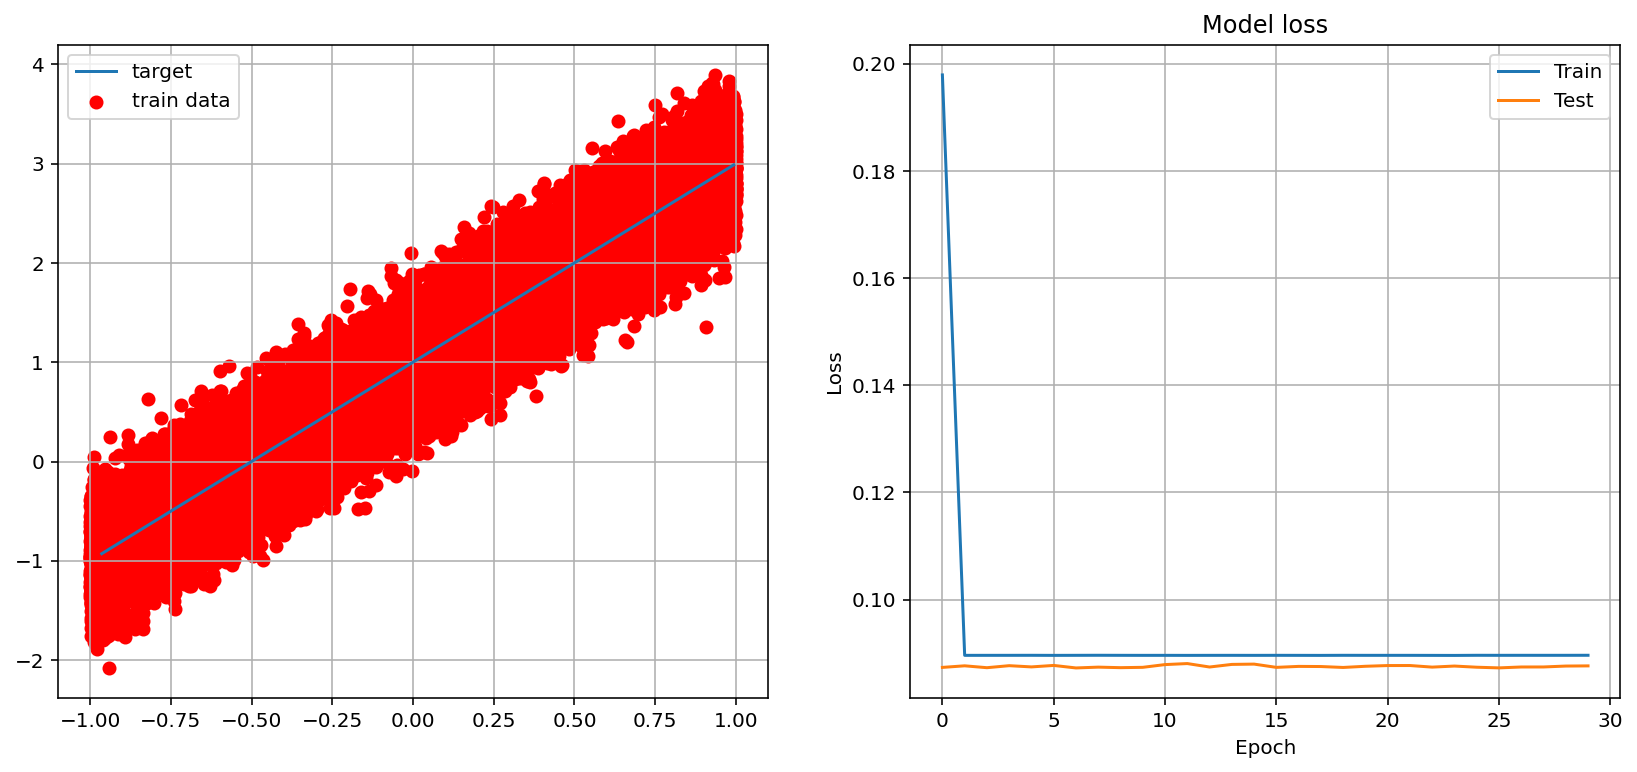

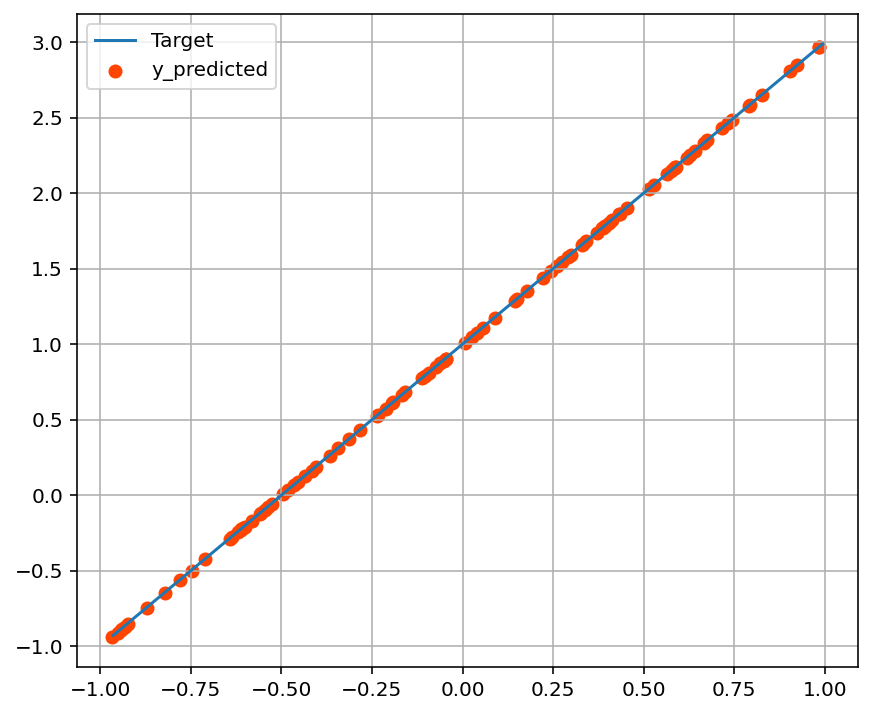

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 


In [7]:
datas=[50,500,50000]
for data in datas:
    Train_my_net(0.3,data,30)

Da ultimo, ho mantenuto costante $\sigma$ ed $N_{epochs}$ ed ho fatto variare $N_{train} \in [50,500,50000]$. Come è ovviamente intuitivo immaginarsi, all'aumentare del numero di punti con cui alleno la rete aumentando nettamente le performance del mio percettrone.

### Esercizio 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for: the number of layers, the number of neurons in each layer, the activation function, the optimizer and the loss function.
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In questo secondo punto dell'esercitazione, ho esteso i modelli precedenti per cercare di ottimizzare una funzione più complessa rispetto a una semplice funzione lineare. La funzione da ottimizzare è un polinomio di terzo grado. Evidentemente un percettrone non è più sufficiente per fittare una funzione così non lineare. Pertanto ho dovuto estendere il modello aumentando numero di layer e numero di neuroni per ciascun layer.
L'esercizio richiede di studiare come variano le predizione della rete neurale su questo particolare tipologia di funzione variandone architettura e parametri. 

<font color="red">N.B.</font>: il numero di parametri con cui posso definire una rete (neuroni, layers, ottimizzatori, loss function, attivazioni...) è estremamente elevato. Pertanto ho riportato nei seguenti grafici solo alcuni di questi modelli che mi sembrano interessanti per sottolineare alcuni aspetti dell'apprendimento delle reti neurali.

In [8]:
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = 4-3*x_valid-2*x_valid**2+3*x_valid**3 # ideal (target) linear function

sigma = 0.25 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(4-3*x_train-2*x_train**2+3*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid**2+3*x_valid**3, sigma)

In [9]:
def Train_with_model(model, N_epoch):
    
    fig, axs= plt.subplots(1,2, figsize=(14,6))
    axs[0].plot(x_valid, y_target, label='target')
    axs[0].scatter(x_train, y_train, color='r', label='train data')
    #axs[0].scatter(x_valid, y_valid, color='r', label='validation data')
    axs[0].legend()
    axs[0].grid(True)

    # compile the model choosing optimizer, loss and metrics objects
    model.summary()
    history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epoch,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)
    model.get_weights()

    # evaluate model
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    # print performance
    print()
    print("Evaluate model over valid set!")
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # evaluate model with the exact curve
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

    # print performance
    print()
    print("Evaluate model over target function!")
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['Train', 'Test'], loc='best')
    axs[1].grid()

    plt.figure(figsize=(7,6))
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,color='orangered')
    plt.plot(x_valid, y_target)
    plt.legend(['Target', 'y_predicted'], loc='best')
    plt.grid(True)
    plt.show()
    print("================================================================================")
    print("==                                                                            ==")
    print("==                              END MODEL                                     ==")
    print("==                                                                            ==")
    print("================================================================================")
    print(" ")
    print(" ")
    print(" ")

#### Rete NN #1: scarsa predizione a causa dell'attivazione

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________

Evaluate model over valid set!
Test loss: 0.5207029581069946
Test accuracy: 0.5207029581069946

Evaluate model over target function!
Test loss: 0.48697376251220703
Test accuracy: 0.48697376251220703


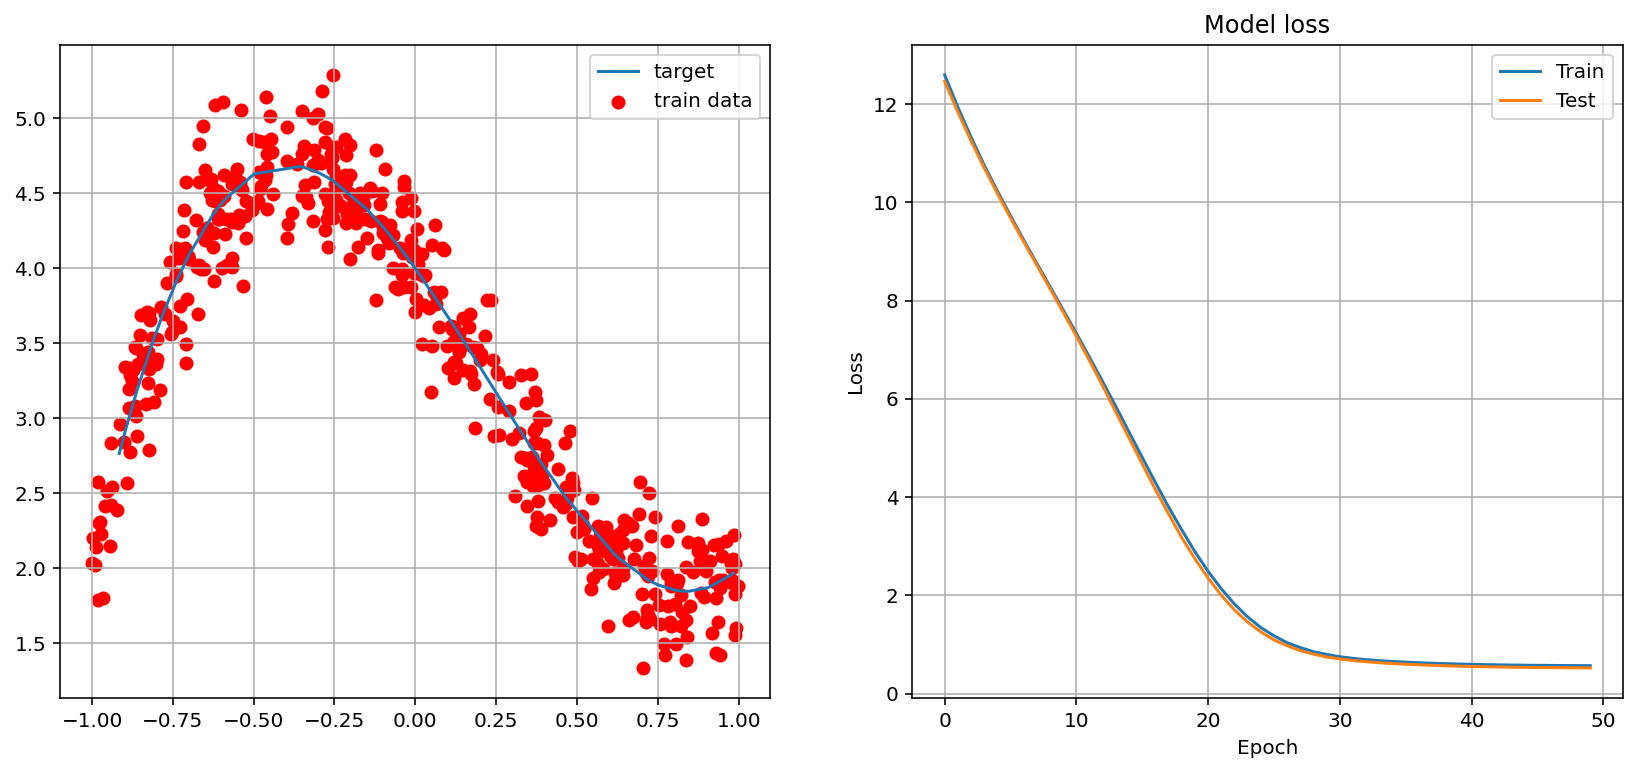

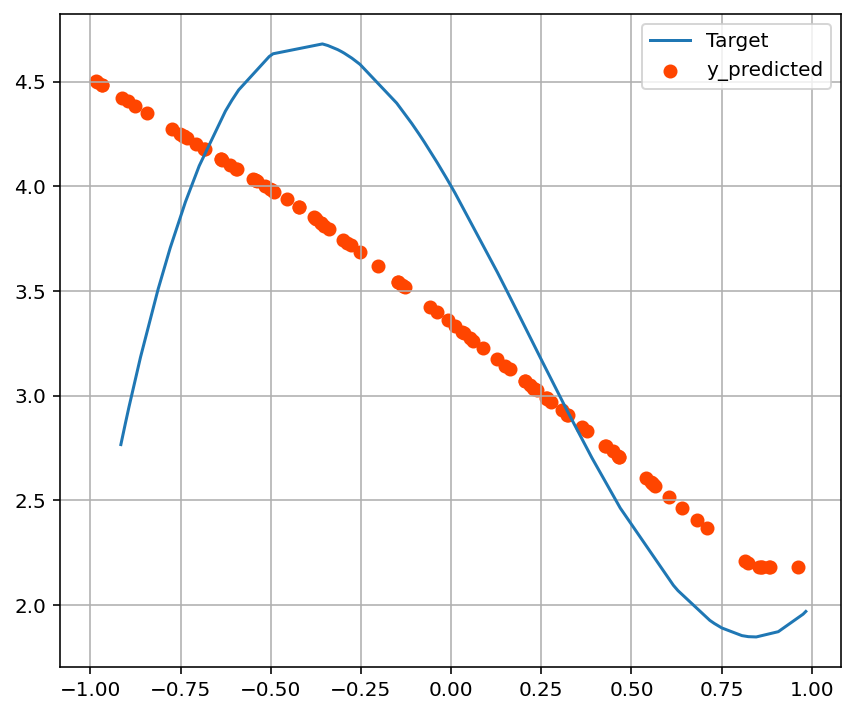

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 


In [10]:
model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,), activation='relu'))
model.add(Dense(3, activation='selu'))
model.add(Dense(1,))
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
Train_with_model(model,50)

Ho deciso di riportare i risultati ottenuti con questa rete per mostrare come una sbagliata scelta dell'archittettura conduce a un bassissimo livello predittivo della rete. Inoltre per ottimizzare questa rete ho utilizzato un altro tipo di ottimizzatore rispetto al solito SGD. L'ottimizzatore utilizzato è *Adam*. *Adam* è in realtà un altro ottimizzatore stocastico come lo è SGD.

Il problemi di questa rete neurale risiedono in due scelte sbagliate:
- La prima è stata quella sul numero di epoche con cui ho fatto il *training*: le epoche sono appena 50. 50 epoche sembrerebbero troppo poche per questa rete. Ma in realtà penso che il vero problema non sia questo ma il secondo.
- Il grosso problema di questa rete risiede nella scelta della funzione di attivazione utilizzata. Infatti per questa rete ho utilizzato una *relu* come funzione di attivazione del primo layer e una *selu* come funzione di attivazione della seconda. Su un problema di questo tipo in cui si cerca di fittare una funzione così ondulata come questo poolinomio, la scelta di funzione di attivazione che sono a tratti così lineari non è l'idea migliore. Infatti la Relu come la Selu ammazzano a zero tutti gli input negativi che ricevono, che è un fattore non banale se si vuole fittare una funzione così poco lineare.

#### Rete #2: scarsa predizione a causa dell'ottimizzatore

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________

Evaluate model over valid set!
Test loss: 6.859889507293701
Test accuracy: 6.859889507293701

Evaluate model over target function!
Test loss: 7.2300262451171875
Test accuracy: 7.2300262451171875


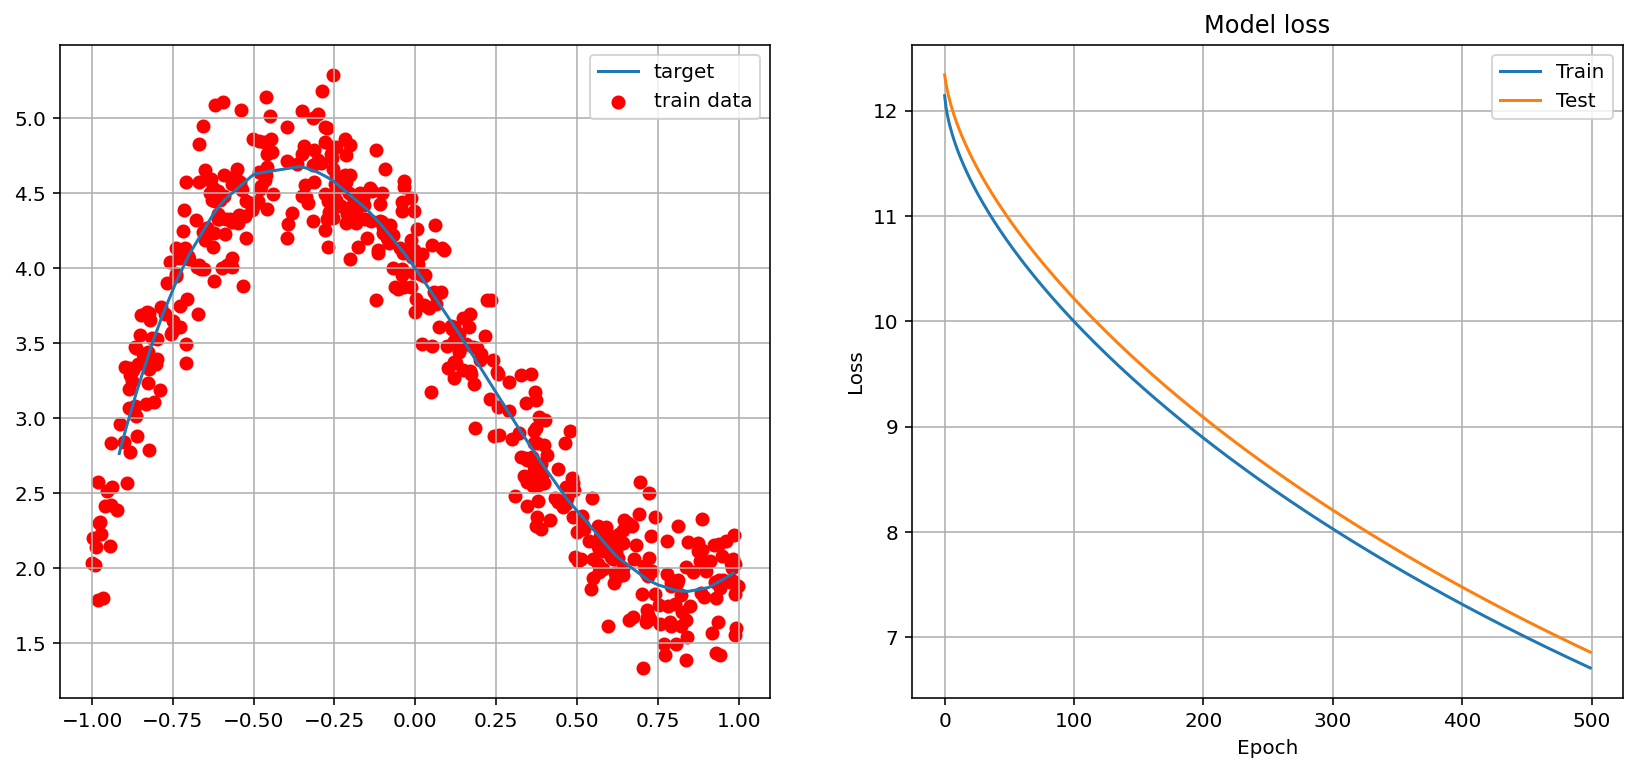

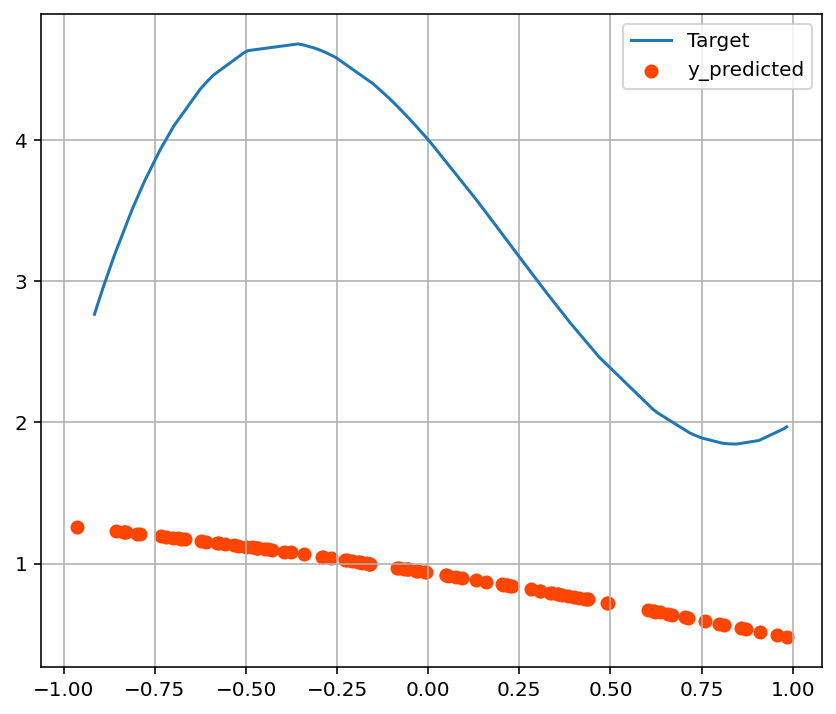

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 


In [11]:
model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,), activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1,))
model.compile(optimizer='Adagrad', loss='mse', metrics=['mse'])
Train_with_model(model,500)

Anche questa rete neurale presenta una scarsissima predizione, anche se ho utlizzato delle tangenti iperboliche *tanh* come funzioni di attivazioni. Il problema infatti in questo caso non risiede nell'architettura, ma nell'ottimizzatore, come si può anche osservare dal grafico della loss function.

In questo allenamento ho utilizzato *AdaGrad* come ottimizzatore. Adagrad è un ottimizzatore che utilizza un tasso di apprendimento indipendente per ogni paramentro: intuitivamente usa tassi di apprendimento più elevati per dati con una distribuzione più sparsa, e tassi più lenti per dati con una distribuzione densa. Quindi solitamente è utilizzato per problemi con set di dati molto estesi e molto sparsi: in quel caso la convergenza è anche migliore di quanto è la convergenza con SGD. 

Tuttavia questo non è il nostro caso: la distribuzione non è per nulla sparsa, ma è anzi molto contenuta ll'interno di un piccolo intervallo, e distribuita con una funzione ben determinata. Per questa ragione il modello presenta un apprendimento così basso.


#### Rete NN #3: la predizione migliora ma sono ancora lontano da una best performance

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________

Evaluate model over valid set!
Test loss: 0.012762359343469143
Test accuracy: 0.012762359343469143

Evaluate model over target function!
Test loss: 0.007811358198523521
Test accuracy: 0.007811358198523521


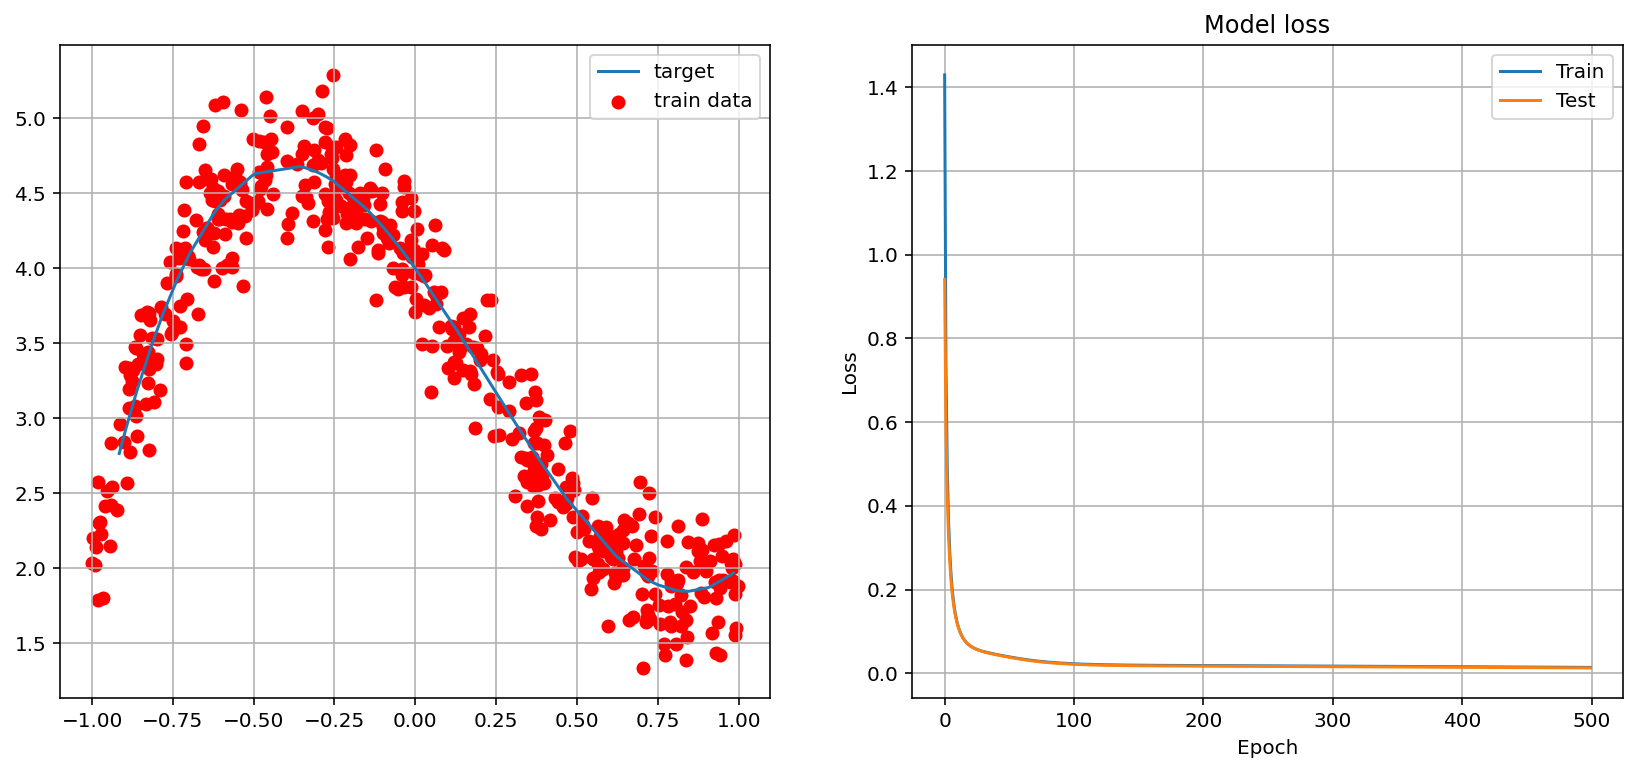

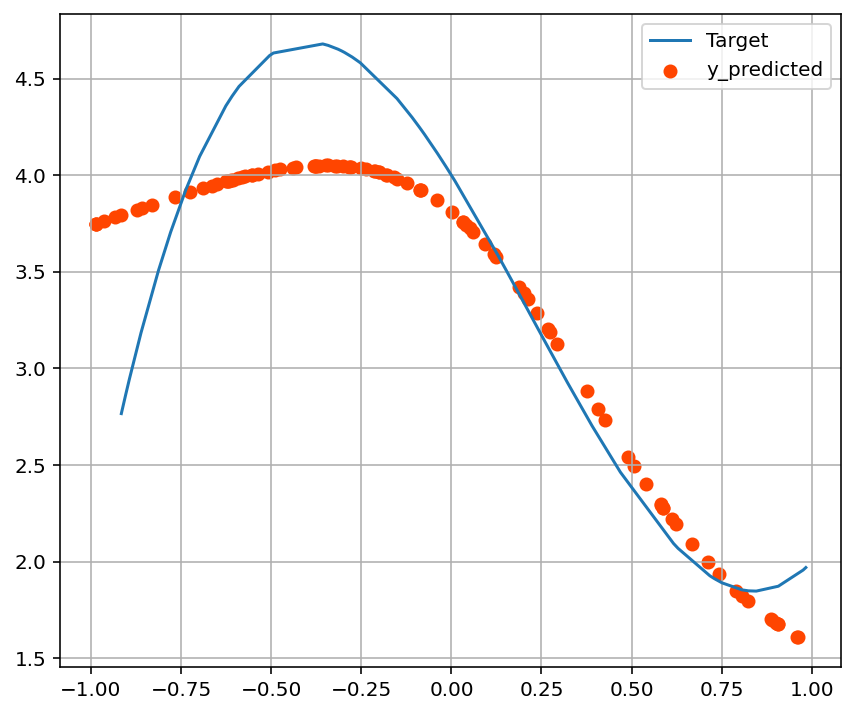

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 


In [12]:
model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,), activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1,))
model.compile(optimizer='sgd', loss='msle', metrics=['msle'])
keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
Train_with_model(model,500)

Ho deciso di riportare i risultati ottenuti con questa rete perchè mi ha sorpreso la capacità di predizione di una rete così piccola.

Infatti, quando ancora non avevo allenato il modello, mi aspettavo dei risultati di gran lunga peggiori rispetto a quelli ottenuti, e invece la predizione è comunque migliorata rispetto ai primi due tentativi:
- Da un lato infatti ho verificato che scegliendo intelligentemente l'architettura della rete, la funzione di attivazione, la loss function e l'ottimizzatore si possono trovare dei risultati notevoli anche per reti neurali così piccole
- Dall'altro lato però una architettura ancora così troppo semplice non mi permette di avere una rete massimamente performante: quì sono solo 17 i gradi di libertà che il modello può variare.

Inoltre in questo caso ho utilizzato una funzione costo diversa dal solito: ho utlizzato *MSLE*. *MSLE* prende il logaritmo della predizione e del vero output: in questo modo si penalizzano maggiormente quei dati che hanno una predizione lontana dal valore di output "vero".


#### Rete NN #4: buona predizione

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 9)                 18        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 80        
_________________________________________________________________
dense_14 (Dense)             (None, 15)                135       
_________________________________________________________________
dense_15 (Dense)             (None, 12)                192       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 13        
Total params: 438
Trainable params: 438
Non-trainable params: 0
_________________________________________________________________

Evaluate model over valid set!
Test loss: 0.2190491110086441
Test accuracy: 0.2190491259098053

Evaluate model over targe

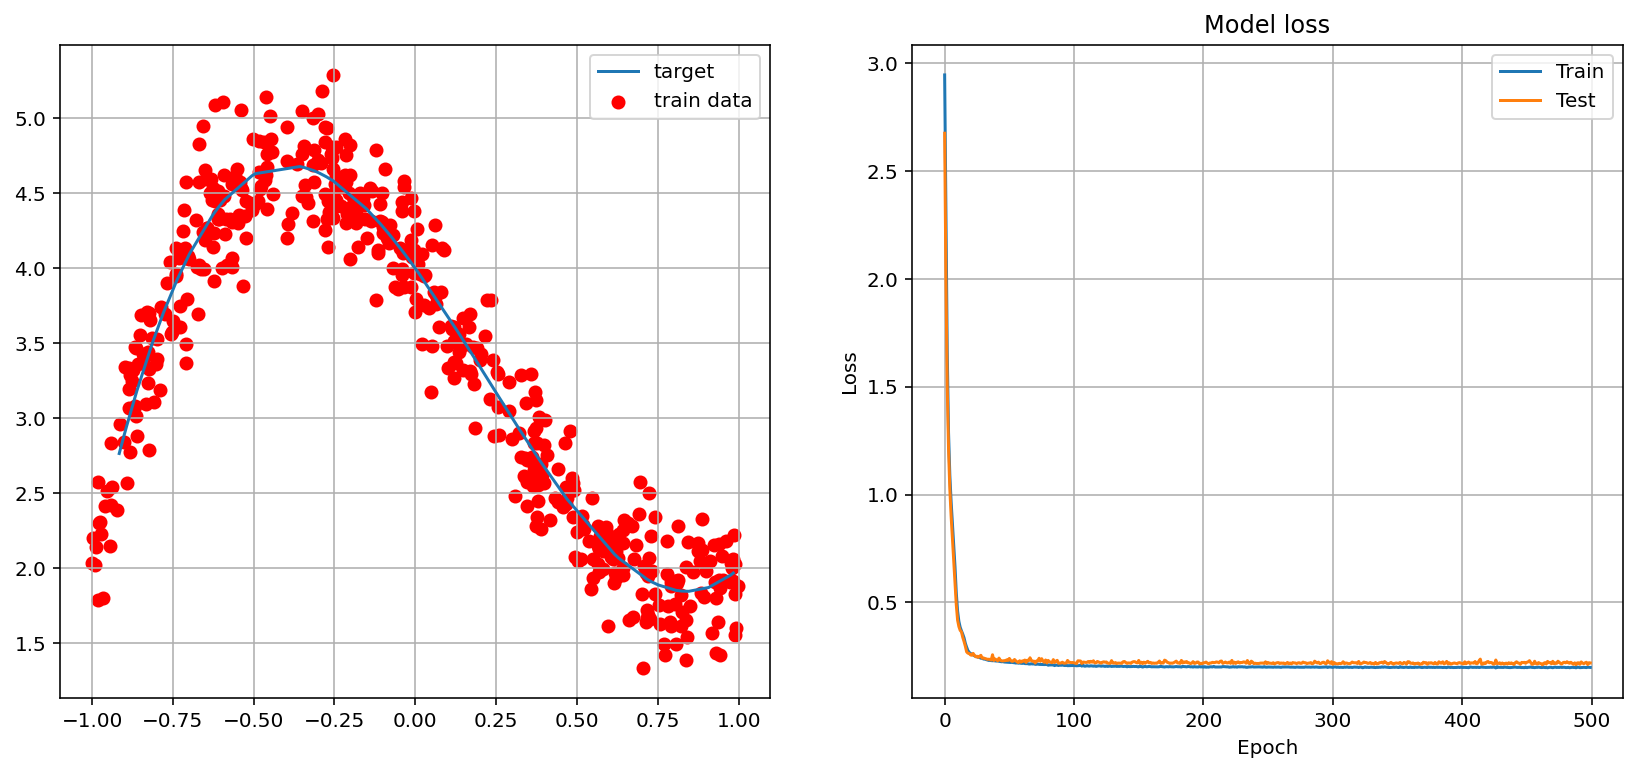

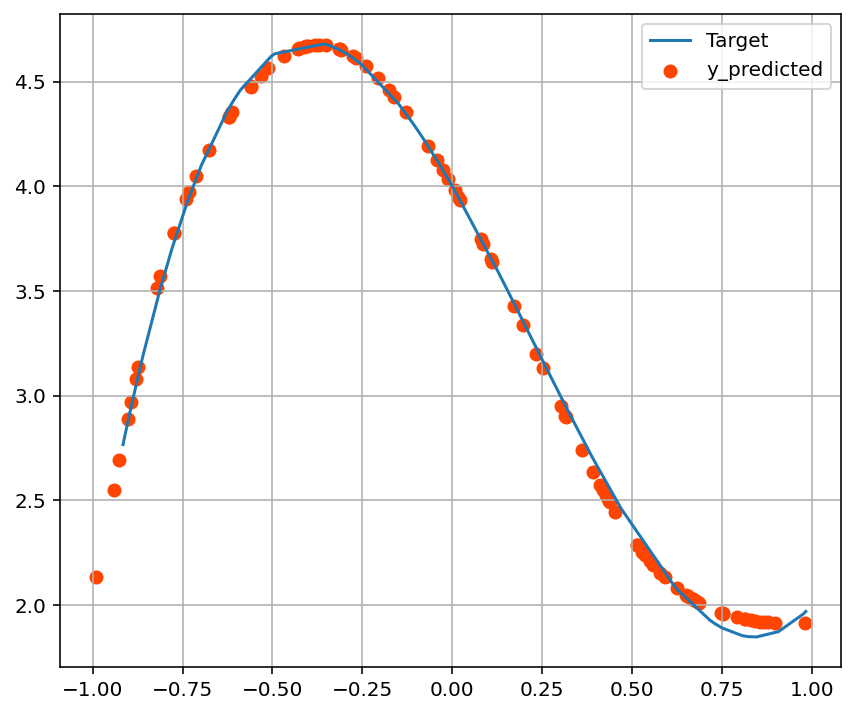

==                                                                            ==
==                              END MODEL                                     ==
==                                                                            ==
 
 
 


In [13]:
model = Sequential()
model.add(Dense(9, input_shape=(1,), activation='tanh'))
model.add(Dense(8, activation='swish'))
model.add(Dense(15, activation='softplus'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='Nadam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
Train_with_model(model,500)

Sono infine riuscito a scrivere un modello che mi garantisce una elevata predizione per i miei dati distribuiti secondo questa funzione polinomiale di tezo grado. L'architettura è di poco più complessa delle reti precedentemente presentate: la fase di allenamento richiede giusto qualche secondo in più delle prime reti. In particolare il modello presenta quattro hidden layers con un numero di neuroni rispettivamente di [9,8,15,12]. Ho scelto diversi tipi di attivazione per questi layer, ma ciascuna di queste funzioni di attivazione è estremamente non lineare (swish, softplus e tanh).

Ho utilizzato come ottimizzatore Nadam: un ottimizzatore stocastico molto simile ad Adam. Mentre da ultimo come funzione costo ho utilizzato la *mean absolute error*:

$$ MAE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)$$


In questo caso è evidente la grande capacità di predizione del modello. Ho quindi provato a vedere che cosa succede se provo a fornire a questo modello (una volta che è stato allenato) deigli input fuori dal range con cui l'ho allenato, per vedere se la rete è comunque in grado di predirre l'andamento del polinomio per valori di $x$ al di fuori del raneg $[-1,1]$.

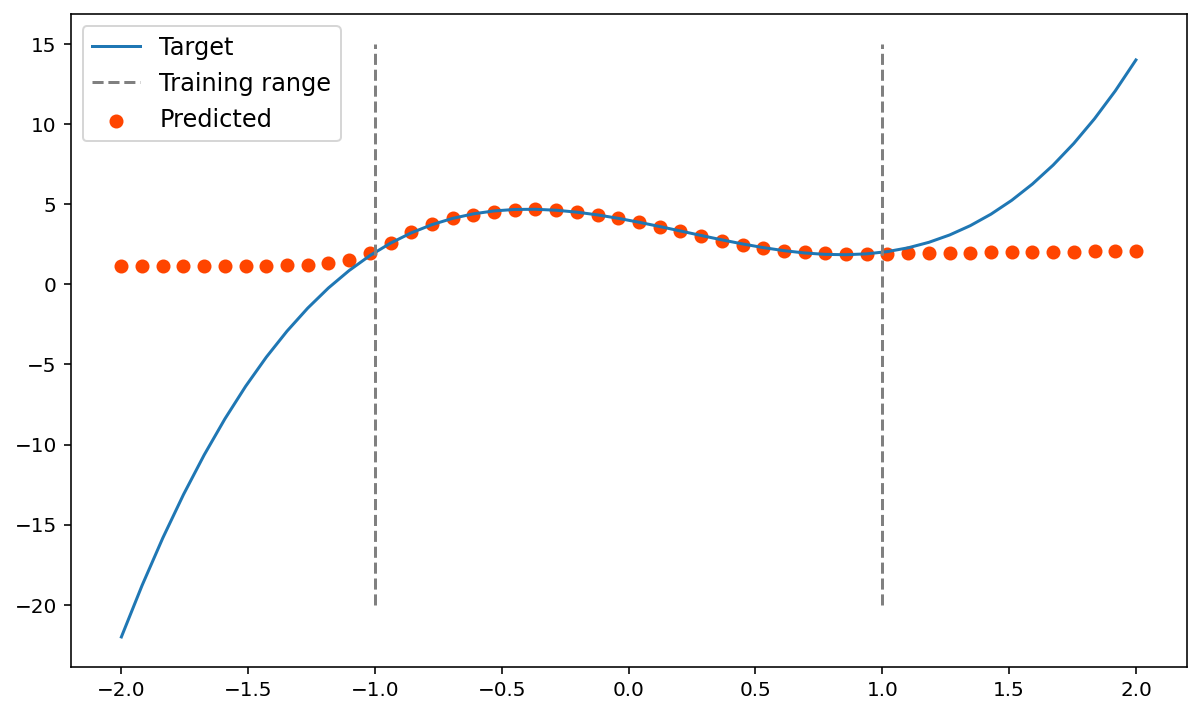

In [21]:
x = np.linspace(-2, 2, 50)
y_target = 4-3*x-2*x**2+3*x**3 # ideal (target) linear function
y_predicted = model.predict(x)
plt.figure(figsize=(10,6))
plt.plot(x,y_target, label='Target')
plt.scatter(x, y_predicted,color='orangered', label='Predicted')
plt.plot([-1,-1],[-20,15], linestyle='dashed',c='grey', label='Training range')
plt.plot([1,1],[-20,15], linestyle='dashed',c='grey')
plt.legend(fontsize=(12))

Come si può osservare dal grafico, benché la rete sia perfettamente in grado di predirre valori all'interno del range di allenamento, appena esco un attimo dal range all'interno del qualle ho trainato la rete, il modello perde la sua capacità predittiva.

<font color="red">Secondo limite</font> delle reti neurali: questi modelli sono molto capaci di imparare a predirre valori all'interno del range di allineamento anche su dati mai visti, ma spesso possono perdere di capacità di predizione se esco dal range di training del modello.

#### Esercizio 11.3

Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ho implementato una rete neurale che sia in grado di fittare una funzione trigonometrica a due variabili. Il procedimento è lo stesso già presentato nei primi due punti dell'esercitazione per i fit di funzioni monodimensionali. L'unica vera differenza è che in questo caso il layer di input detto per l'appunto *input layer* non è costituito da un solo neurone, bensì da due. Per il resto valgono tutte le considerazioni sull'architettura già presentate per le altre reti neurali.

Per il fit di questa funzione a due variabili ho utilizzato $n_{train}=5000$ e $n_{valid}=500$. I punti per il training set e per il validation set vengono estratti con un errore dato da $\sigma=0.3$. Per questa rete neurale profonda ho utlizzato 5 *hidden layers* con numeor di neuroni rispettivamente di $[15,23,23,7,3]$. Le funzioni di attivazioni utilizzate sono funzioni altamente non lineari come *tanh*, *sigmoidi* e *softplus*.

Da ultimo ho eseguito il traininf con:
- Adam come ottimizzatore
- La Mean Square Error (MSE) come funzione costo

La rete neurale costruita risulta essere estremamente sufficiente nella predizione dei valori target, come riportato nell'ultima immagine del report.

/var/folders/hm/82g70l1n7pb4j9g9k7fgpq8h0000gn/T/ipykernel_862/4181761243.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


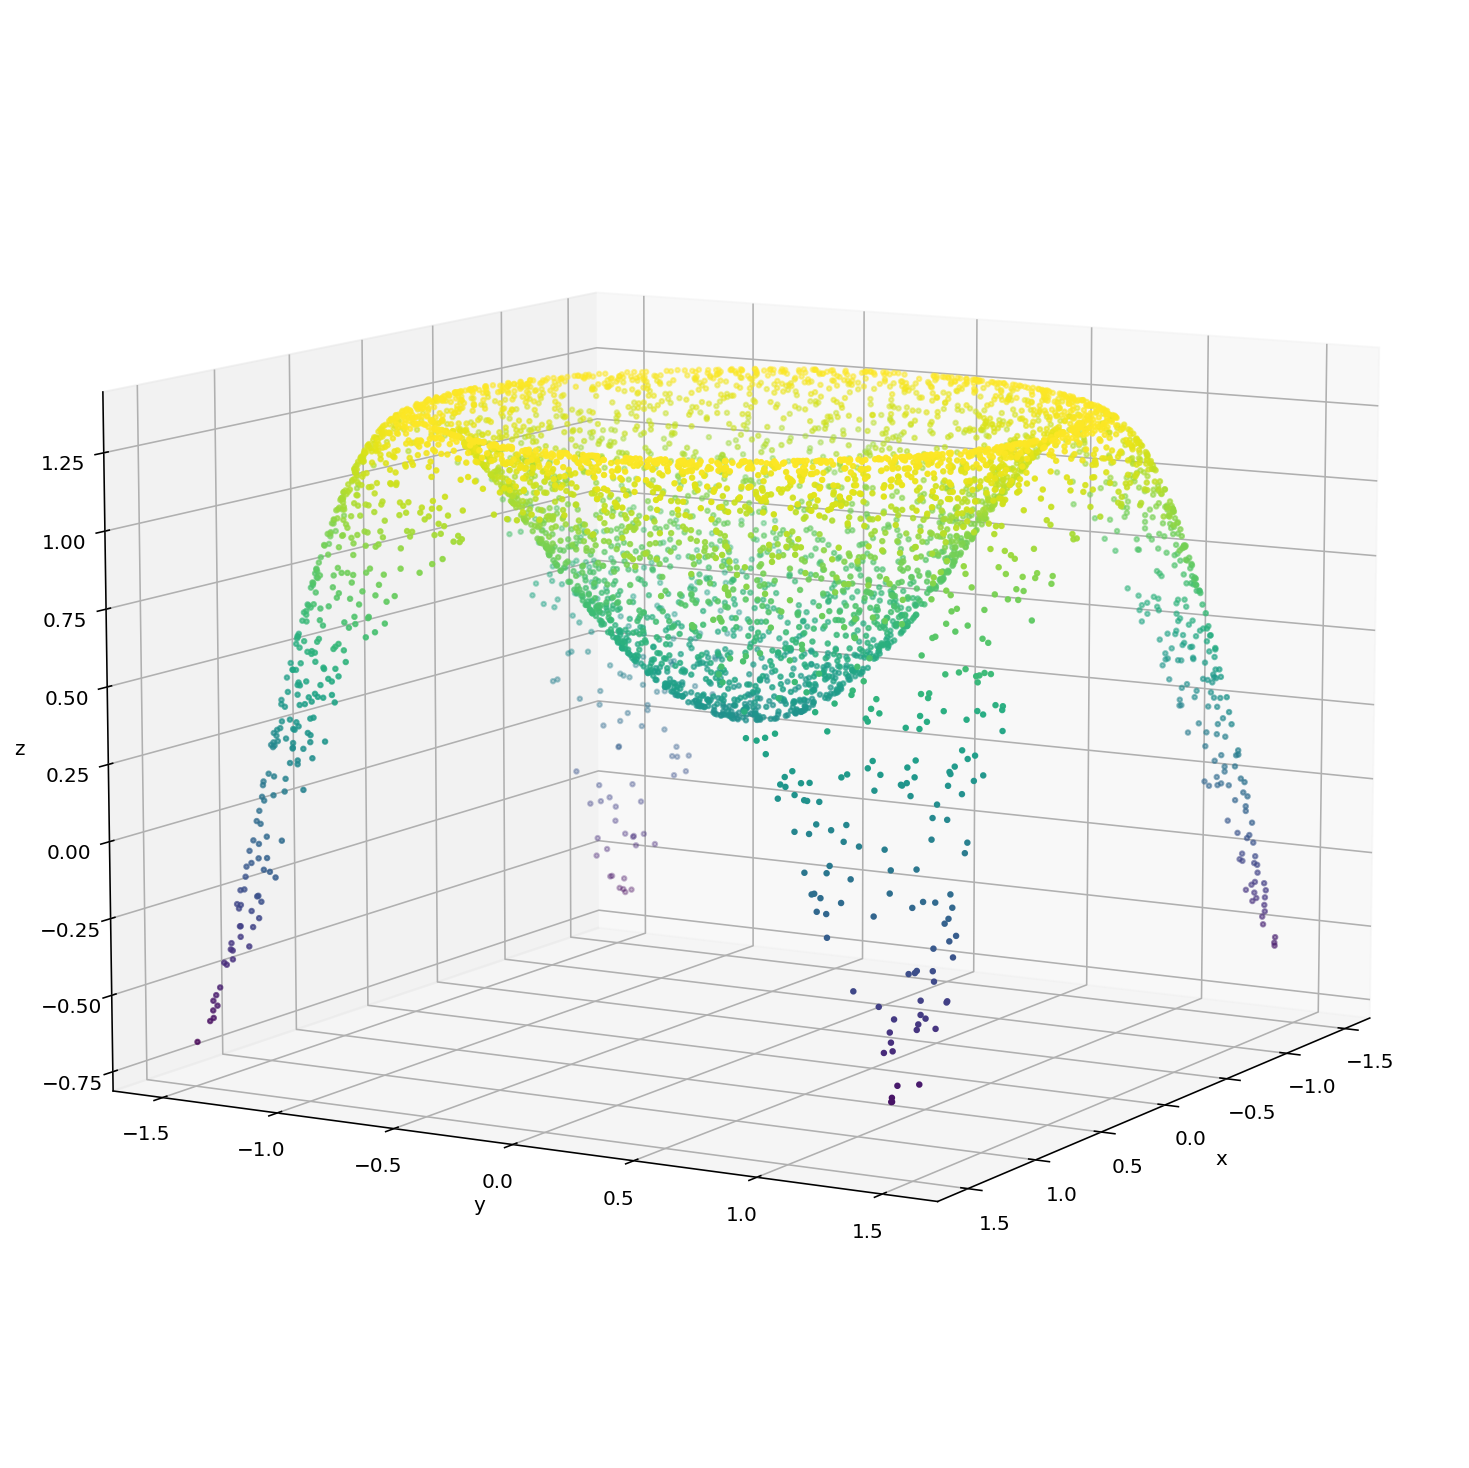

In [21]:
import random
from mpl_toolkits.mplot3d import Axes3D

n_train=5000
n_valid=500
sigma=0.3
x_train = np.zeros((n_train, 2))
y_train = np.zeros((n_train, 1))

x_valid = np.zeros((n_valid, 2))
y_valid = np.zeros((n_valid, 1))

for i in range(n_train):
    x_train[i,0]=random.uniform(-1.5, 1.5)
    x_train[i,1]=random.uniform(-1.5, 1.5)
    y_train[i]= np.sin(x_train[i,0]**2+x_train[i,1]**2)+sigma
for i in range(n_valid):
    x_valid[i,0]=random.uniform(-1.5, 1.5)
    x_valid[i,1]=random.uniform(-1.5, 1.5)
    y_valid[i]= np.sin(x_valid[i,0]**2+x_valid[i,1]**2)+sigma
    
    
fig = plt.figure(figsize=(10,20))
ax = Axes3D(fig)
ax.scatter(x_train[:,0], x_train[:,1], y_train, c=y_train, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 15)                45        
_________________________________________________________________
dense_13 (Dense)             (None, 23)                368       
_________________________________________________________________
dense_14 (Dense)             (None, 13)                312       
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 98        
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 24        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 4         
Total params: 851
Trainable params: 851
Non-trainable params: 0
________________________________________________________

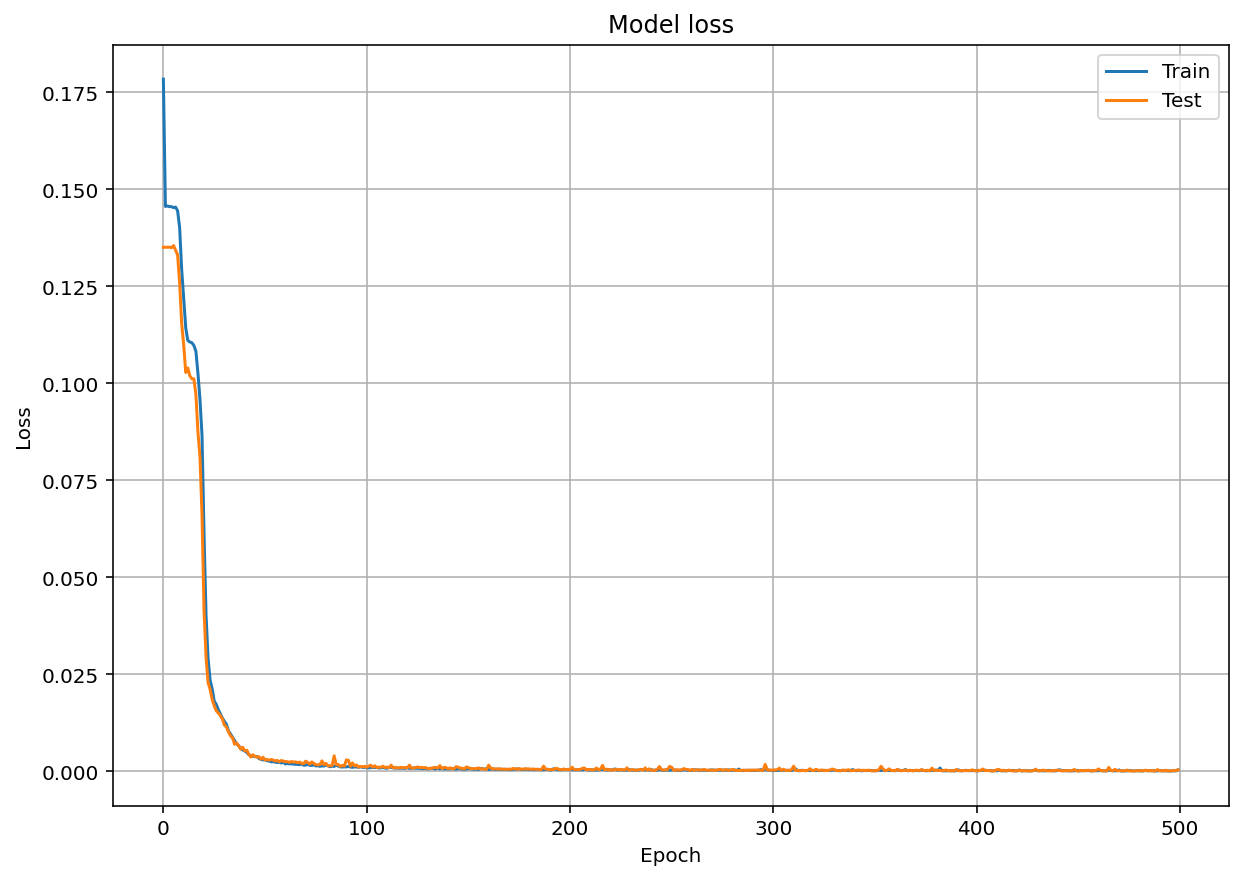

In [22]:

model = tf.keras.Sequential()
model.add(Dense(15, input_shape=(2,), activation='tanh'))
model.add(Dense(23, activation='tanh'))
model.add(Dense(13, activation='sigmoid'))
model.add(Dense(7, activation='softplus'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(1, ))

model.compile(optimizer='Adam', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=500,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)
model.get_weights()
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    # print performance
print()
print("Evaluate model over valid set!")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

    # evaluate model with the exact curve
#score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

    # print performance
print()
print("Evaluate model over target function!")
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
plt.show()

/var/folders/hm/82g70l1n7pb4j9g9k7fgpq8h0000gn/T/ipykernel_862/1492982032.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


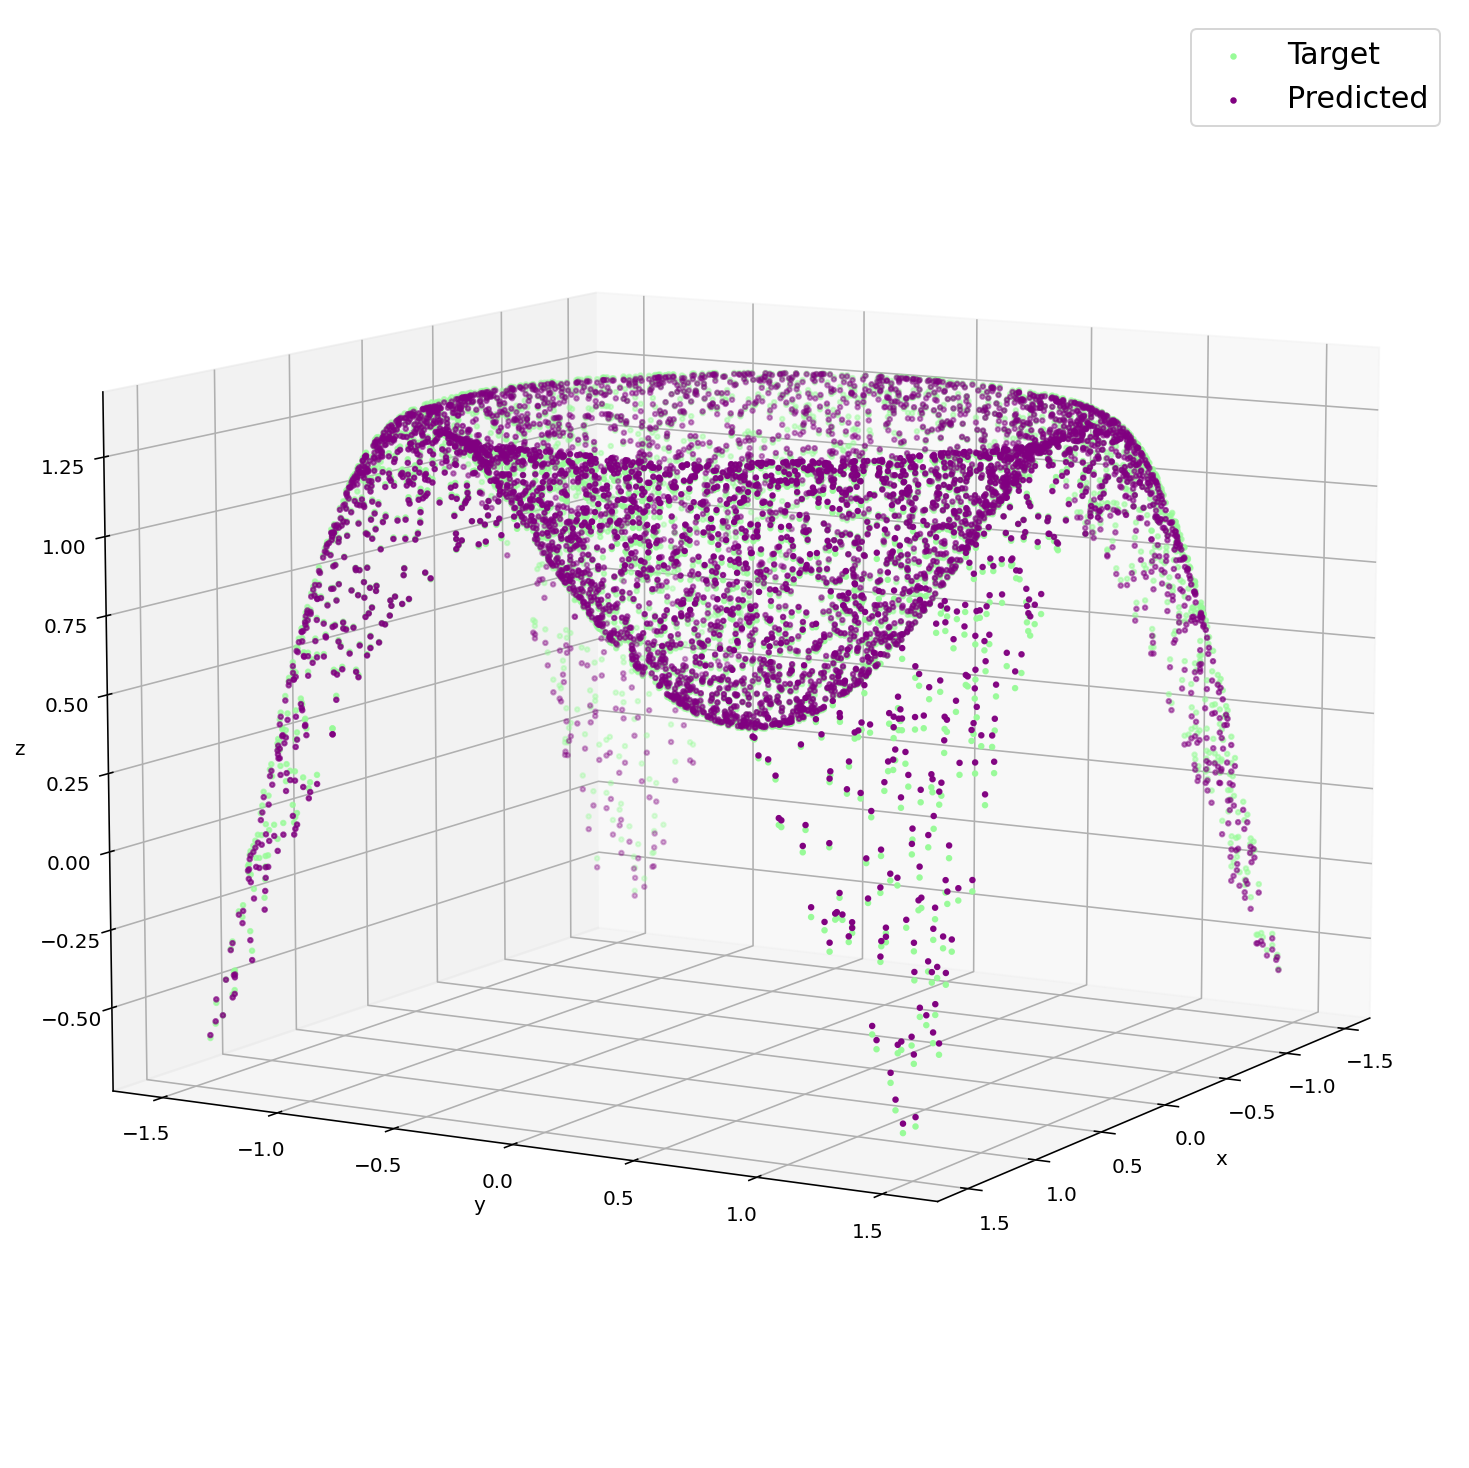

In [26]:
n_target=5000
x_target = np.zeros((n_target, 2))
y_target = np.zeros((n_target, 1))
sigma=0.3

for i in range(n_target):
    x_target[i,0]=random.uniform(-1.5, 1.5)
    x_target[i,1]=random.uniform(-1.5, 1.5)
    y_target[i]= np.sin(x_target[i,0]**2+x_target[i,1]**2)+sigma
    
y_predicted=model.predict(x_target)


fig = plt.figure(figsize=(10,20))
ax = Axes3D(fig)
ax.scatter(x_target[:,0], x_target[:,1], y_target, c='palegreen', marker='.',label='Target')
ax.scatter(x_target[:,0], x_target[:,1], y_predicted, c='purple', marker='.', label='Predicted')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(fontsize=15)
ax.view_init(10, 30)
plt.show()